In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all,reviews

In [2]:
import json
import pandas as pd
import numpy as np
import re
import sys
import nltk
from nltk.corpus import stopwords, sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import collections
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Activation
from keras.preprocessing.image import ImageDataGenerator

In [5]:
data=pd.read_csv("Suicide_Detection.csv")

In [6]:
from collections import Counter
Counter(data['class'])

Counter({'suicide': 116037, 'non-suicide': 116037})

In [7]:
#Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)


data['cleanText']=data['text'].map(lambda s:preprocess(s)) 

In [ ]:
df=data
# Number of positive and negative classes
positive_count = df[df['class'] == 'suicide'].shape[0]
negative_count = df[df['class'] == 'non-suicide'].shape[0]

# Number of posts
total_posts = len(df)

# Calculate word counts for each post
df['word_count'] = df['cleanText'].apply(lambda x: len(x.split()))

# Find the largest and smallest posts in terms of word count
largest_post = df[df['word_count'] == df['word_count'].max()]['cleanText'].values[0]
smallest_post = df[df['word_count'] == df['word_count'].min()]['cleanText'].values[0]

# Calculate the average number of words
average_word_count = df['word_count'].mean()

# Display the statistics
print("Number of Positive Posts:", positive_count)
print("Number of Negative Posts:", negative_count)
print("Total Number of Posts:", total_posts)
print("Largest Post (in terms of words):", largest_post)
print("Smallest Post (in terms of words):", smallest_post)
print("Average Number of Words:", average_word_count)

In [ ]:
df=df.dropna()
# Number of posts
total_posts = len(df)

# Calculate word counts for each post
df['word_count'] = df['cleanText'].apply(lambda x: len(x.split()))

# Find the largest and smallest posts in terms of word count
largest_post = df[df['word_count'] == df['word_count'].max()]['cleanText'].values[0]
smallest_post = df[df['word_count'] == df['word_count'].min()]['cleanText'].values[0]

# Calculate the average number of words
average_word_count = df['word_count'].mean()

# Output the results
print("Number of Words in Smallest Post:", df['word_count'].min())
print("Number of Words in Largest Post:", df['word_count'].max())
print("Average Number of Words:", average_word_count)

In [14]:
data=pd.read_csv("preprocesseddata.csv")

In [15]:
data["cleanText"]=data["cleanText"].astype(str)

In [19]:
data5=data.loc[data['class'] == "suicide"]
data4=data.loc[data['class'] == "non-suicide"]

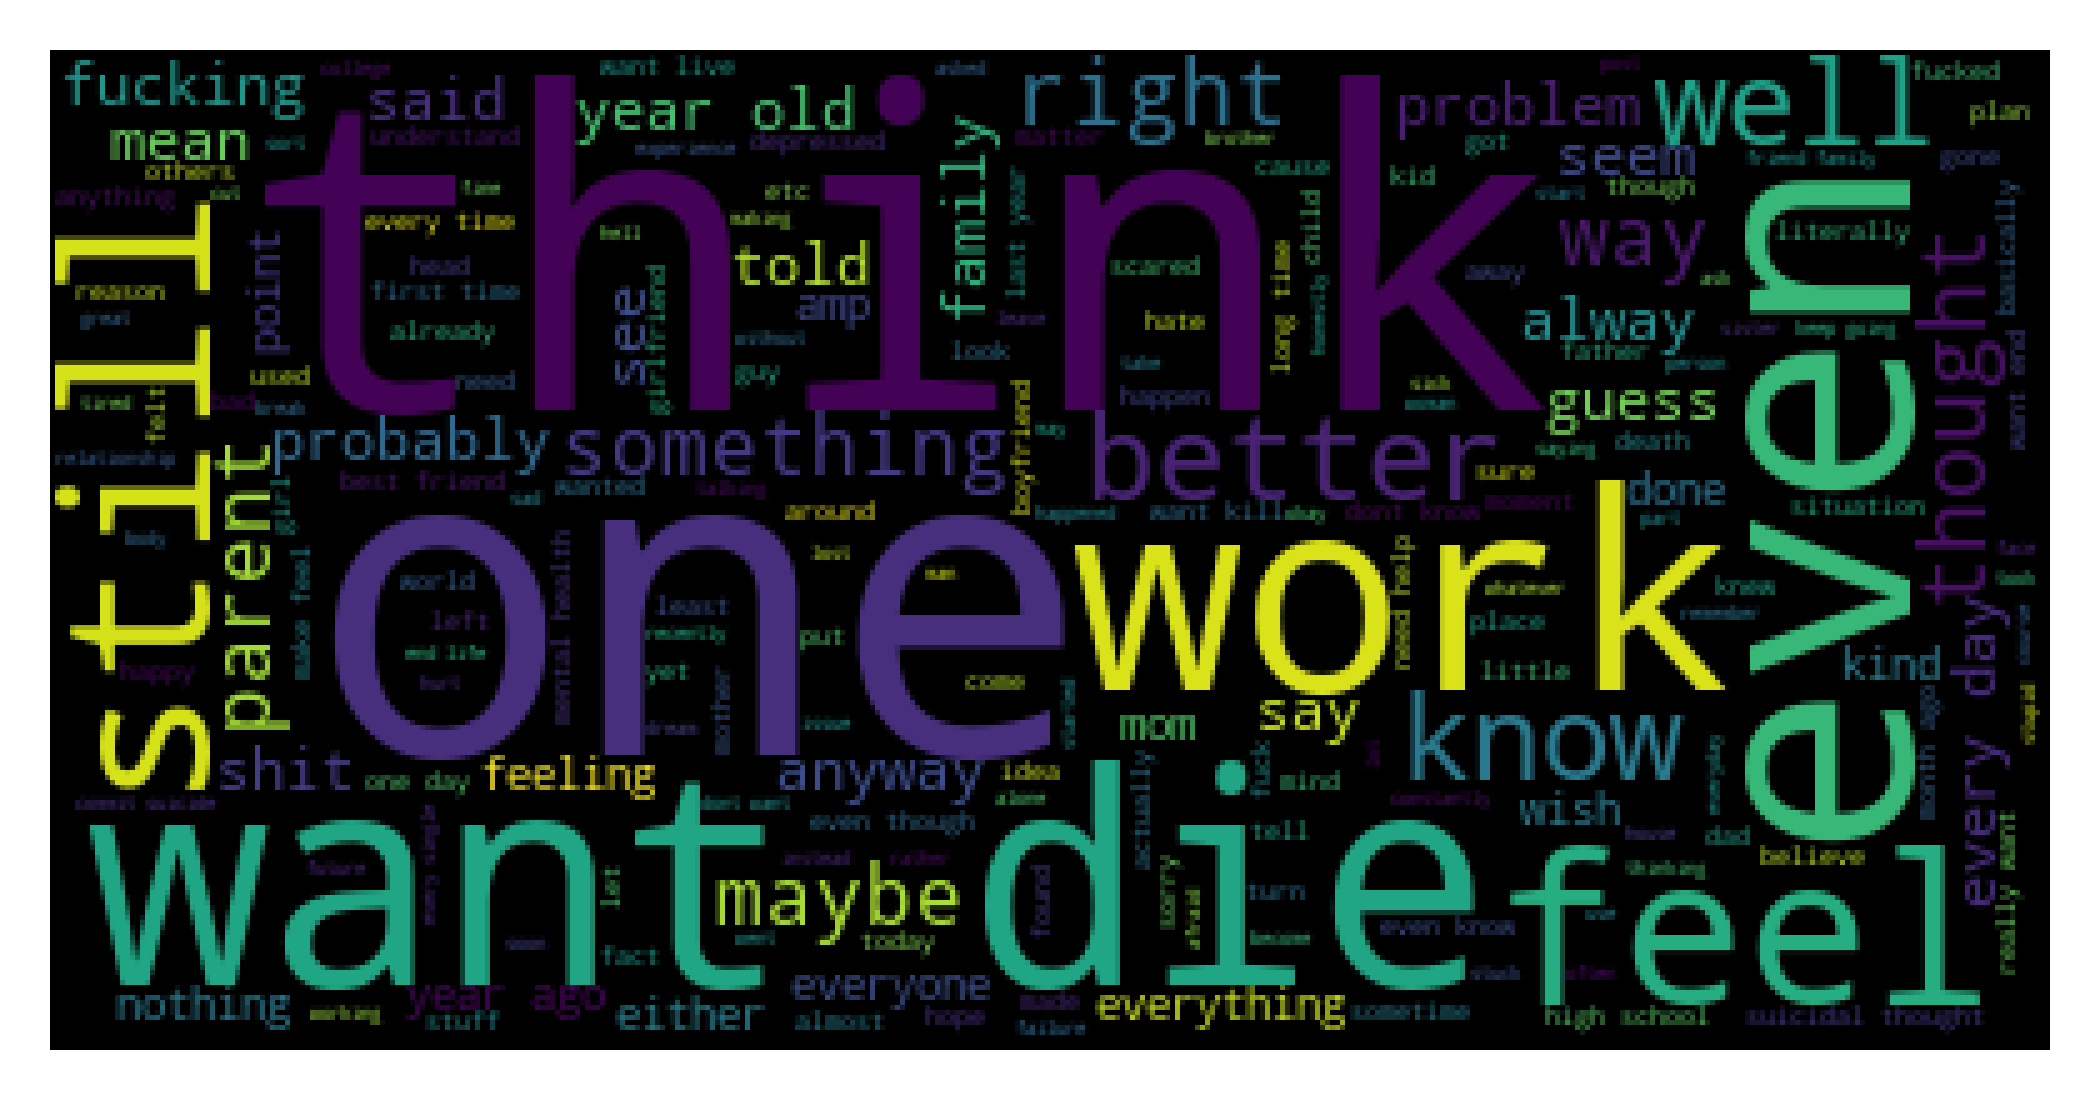

In [25]:
#wordcloud to see to most useable word to analyze the topics in tweets text
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
wordcloud = WordCloud().generate(' '.join(data5['cleanText']))
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 2), facecolor = None, dpi=500) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.savefig('suicideWC.pdf')

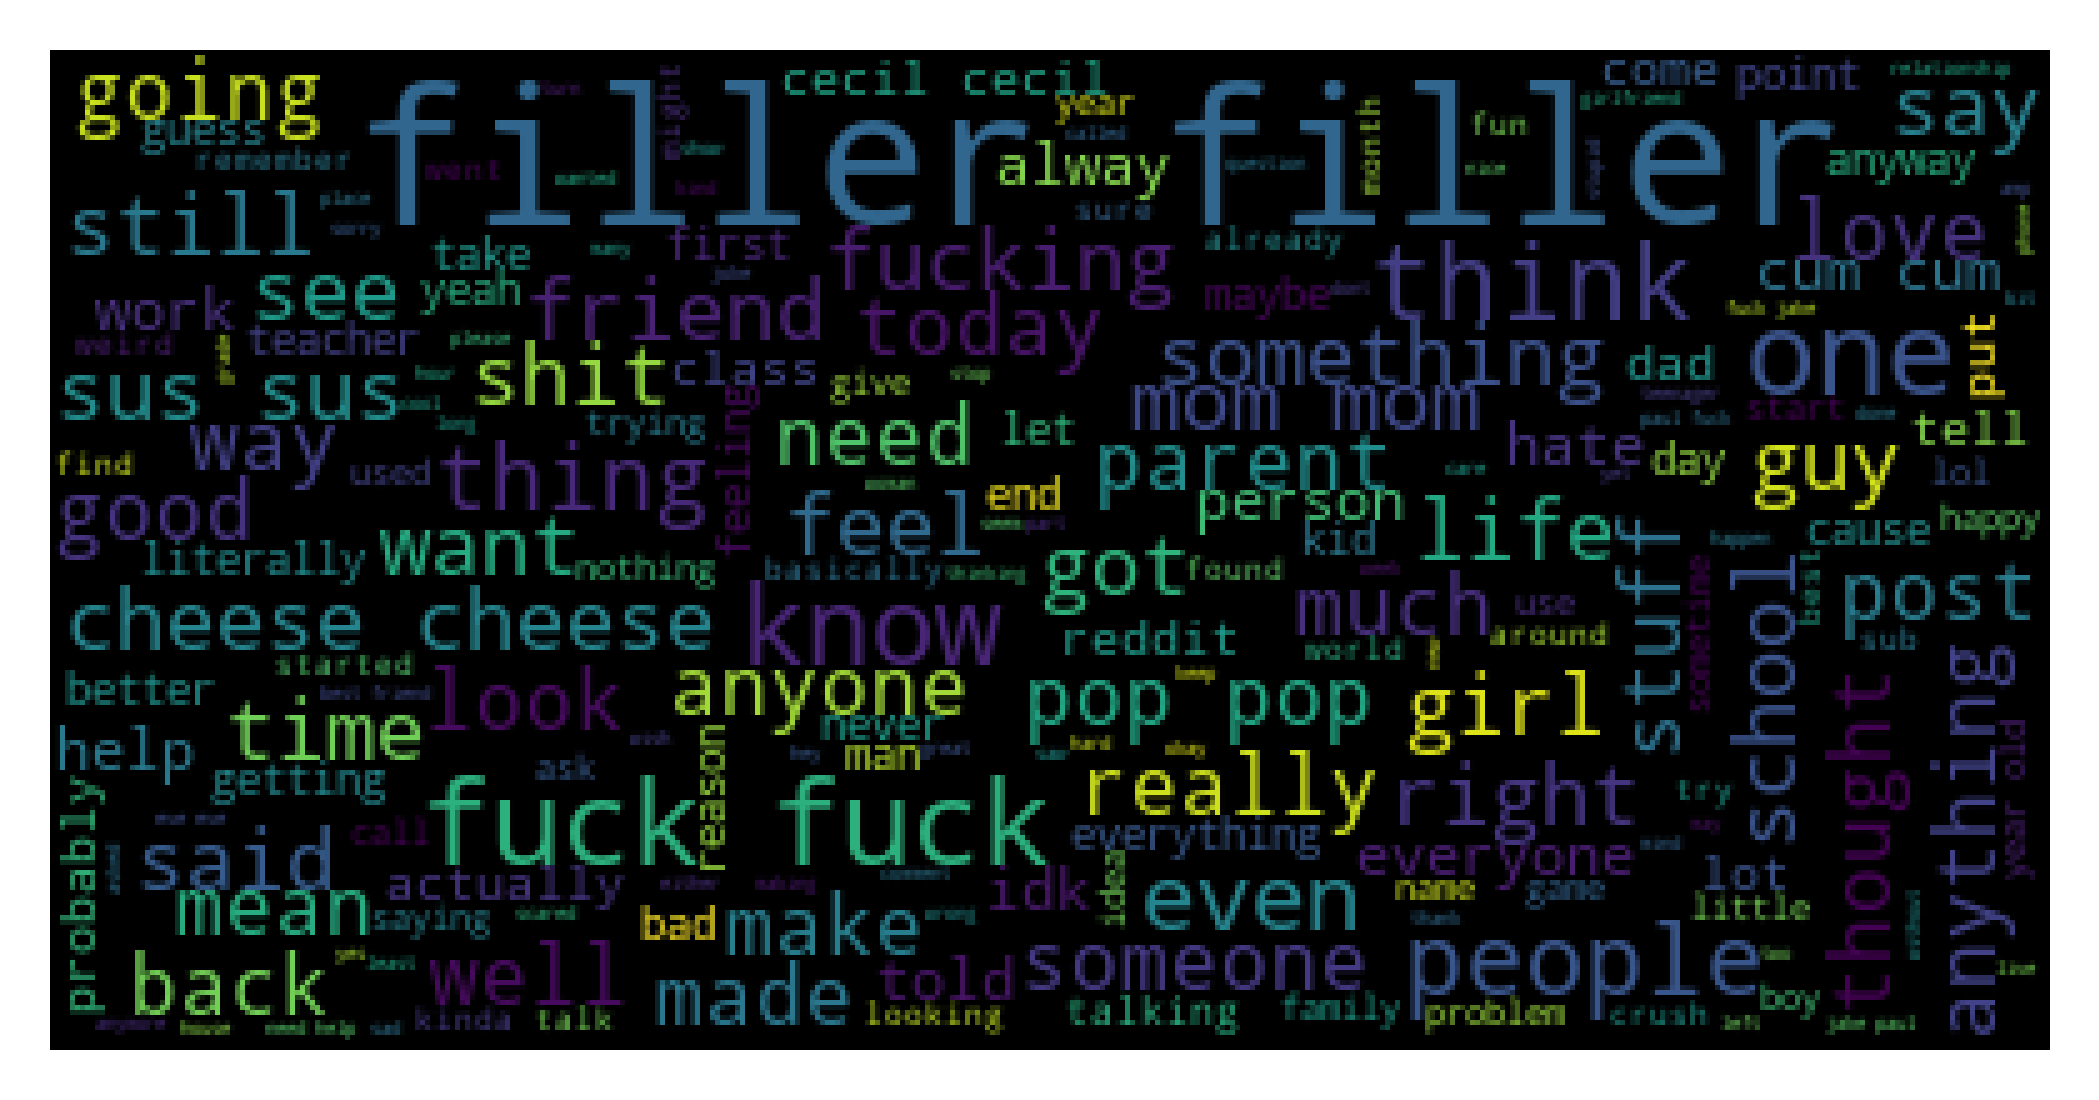

In [26]:
#wordcloud to see to most useable word to analyze the topics in tweets text
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
wordcloud = WordCloud().generate(' '.join(data4['cleanText']))
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 2), facecolor = None, dpi=500) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('nonsuicideWC.pdf')

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['cleanText'],data['class'],test_size=0.20, random_state=200,shuffle=True)

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_train)
y = vectorizer.transform(X_test)

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(X_train)
y1 = vectorizer.transform(X_test)

In [174]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer()
X2 = vectorizer.fit_transform(X_train)
y2= vectorizer.transform(X_test)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
Xf = vectorizer.fit_transform(data['cleanText'])

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
Xf1 = vectorizer.fit_transform(data['cleanText'])

from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer()
Xf2 = vectorizer.fit_transform(data['cleanText'])

In [18]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
y = data['class']
X = Xf.astype(int)
X=abs(X)
chi2_features = SelectKBest(chi2, k = 15000)
X_kbest_features = chi2_features.fit_transform(X,y)

X = Xf1.astype(int)
X=abs(X)
chi2_features = SelectKBest(chi2, k = 15000)
X_kbest_features1 = chi2_features.fit_transform(X,y)

X = Xf2.astype(int)
X=abs(X)
chi2_features = SelectKBest(chi2, k =15000)
X_kbest_features2 = chi2_features.fit_transform(X,y)


In [10]:
Xf1.shape

(232074, 134206)

# BoW

In [158]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
dtP1=dt.fit(X1, y_train).predict(y1)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9268770871485511
              precision    recall  f1-score   support

 non-suicide       0.91      0.95      0.93     23253
     suicide       0.95      0.90      0.92     23162

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

[[22151  1102]
 [ 2292 20870]]


In [159]:

from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier(max_depth=200, learning_rate=0.2, n_estimators=50, random_state=52)
dtP1=dt.fit(X1, y_train).predict(y1)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.8778843046428956
              precision    recall  f1-score   support

 non-suicide       0.87      0.89      0.88     23253
     suicide       0.89      0.87      0.88     23162

    accuracy                           0.88     46415
   macro avg       0.88      0.88      0.88     46415
weighted avg       0.88      0.88      0.88     46415

[[20697  2556]
 [ 3112 20050]]


In [160]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=200, max_depth=50) 
dtP1=dt.fit(X1, y_train).predict(y1)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.857567596682107
              precision    recall  f1-score   support

 non-suicide       0.83      0.90      0.86     23253
     suicide       0.89      0.81      0.85     23162

    accuracy                           0.86     46415
   macro avg       0.86      0.86      0.86     46415
weighted avg       0.86      0.86      0.86     46415

[[20963  2290]
 [ 4321 18841]]


In [161]:
from sklearn.svm import LinearSVC
print("SVC")
dt = LinearSVC()
dtP1=dt.fit(X1, y_train).predict(y1)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

SVC


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9224819562641388
              precision    recall  f1-score   support

 non-suicide       0.90      0.95      0.92     23253
     suicide       0.94      0.90      0.92     23162

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415

[[22028  1225]
 [ 2373 20789]]


In [162]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)
dtP1=dt.fit(X1, y_train).predict(y1)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

ETC
0.7676397716255521
              precision    recall  f1-score   support

 non-suicide       0.70      0.93      0.80     23253
     suicide       0.90      0.60      0.72     23162

    accuracy                           0.77     46415
   macro avg       0.80      0.77      0.76     46415
weighted avg       0.80      0.77      0.76     46415

[[21699  1554]
 [ 9231 13931]]


In [163]:
from sklearn.neighbors import KNeighborsClassifier
dt = KNeighborsClassifier(n_neighbors=3)
dtP1=dt.fit(X1, y_train).predict(y1)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.7691909942906388
              precision    recall  f1-score   support

 non-suicide       0.72      0.88      0.79     23253
     suicide       0.84      0.66      0.74     23162

    accuracy                           0.77     46415
   macro avg       0.78      0.77      0.77     46415
weighted avg       0.78      0.77      0.77     46415

[[20353  2900]
 [ 7813 15349]]


In [8]:

array1=[[22151 , 1102],
 [ 2292 ,20870]]
LR = pd.DataFrame(array1, index = [i for i in "01"],
                  columns = [i for i in "01"])

array2=[[20697 , 2556],
 [ 3112, 20050]]
GBM = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])

array3=[[20963 , 2290],
 [ 4321, 18841]]
RF = pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

array4=[[22028,  1225],
 [ 2373, 20789]]
SVC = pd.DataFrame(array4, index = [i for i in "01"],
                  columns = [i for i in "01"])

array5=[[21699 , 1554],
 [ 9231, 13931]]
ETC = pd.DataFrame(array5, index = [i for i in "01"],
                  columns = [i for i in "01"])

array6=[[20353 , 2900],
 [ 7813, 15349]]
KNN = pd.DataFrame(array6, index = [i for i in "01"],
                  columns = [i for i in "01"])

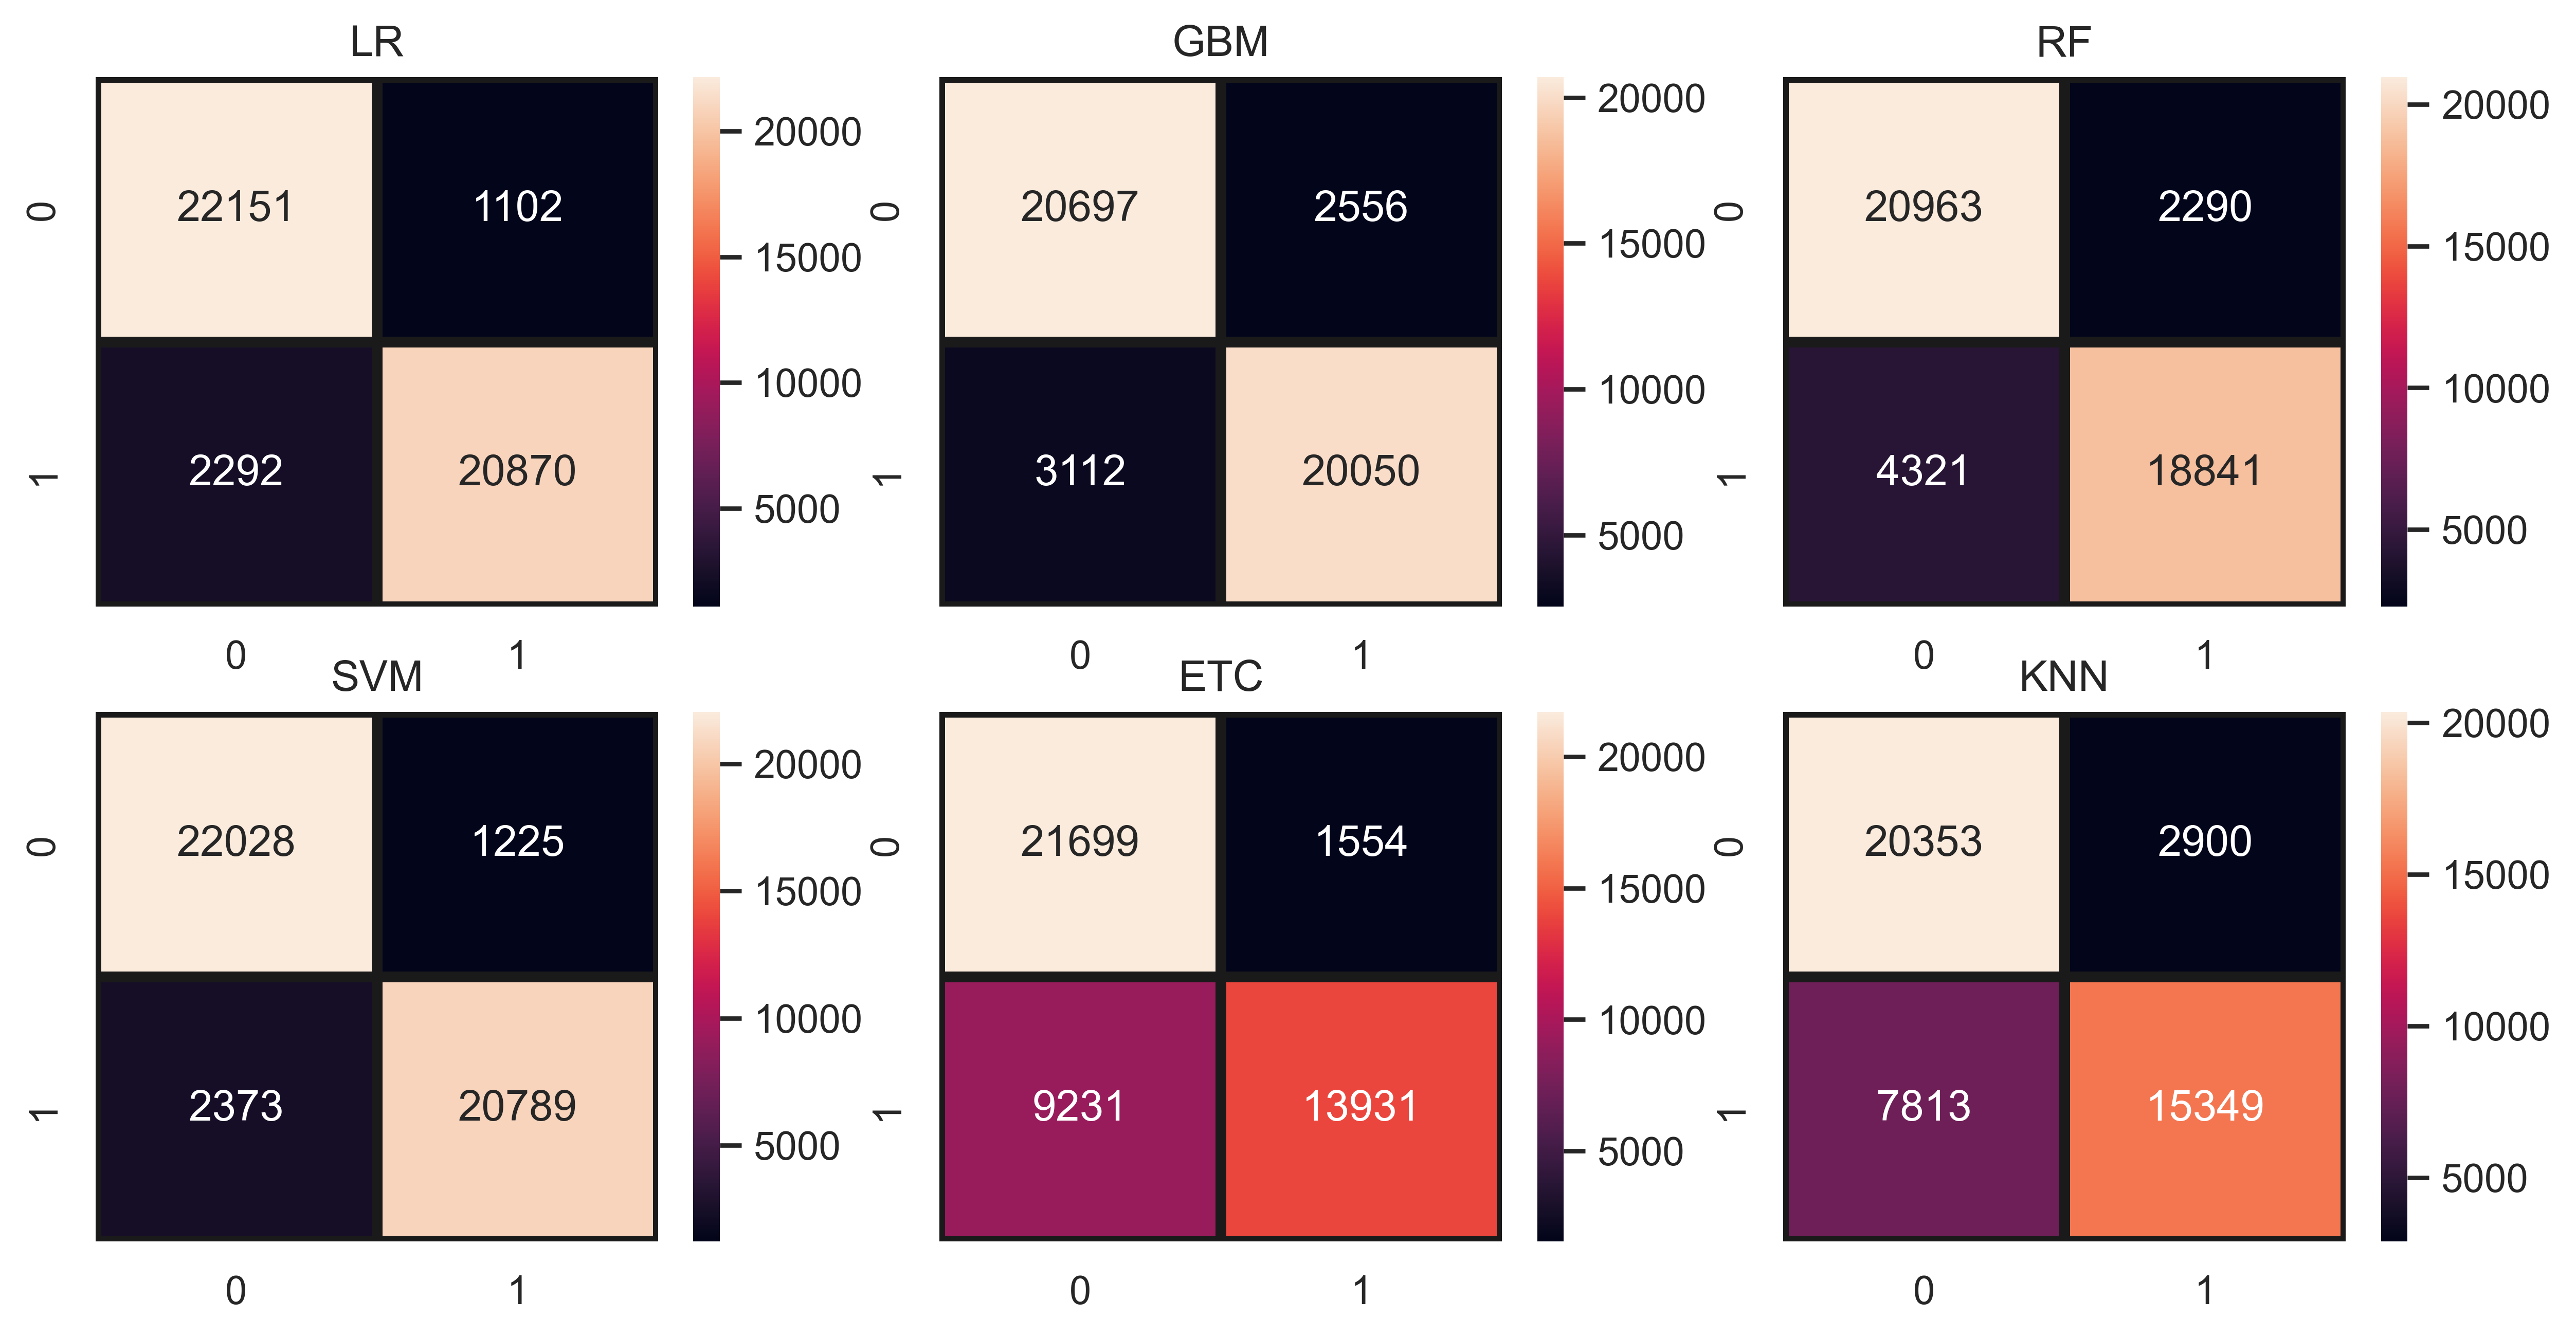

In [19]:
i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A,fontsize=12)

plt.figure(1,figsize=(12, 6),dpi=500)
plt.subplot(231) 
plot_sub_sentiment(LR,'LR')
plt.subplot(232)
plot_sub_sentiment(GBM,'GBM')
plt.subplot(233) 
plot_sub_sentiment(RF,'RF')
plt.subplot(234)
plot_sub_sentiment(SVC,'SVM')
plt.subplot(235) 
plot_sub_sentiment(ETC,'ETC')
plt.subplot(236)
plot_sub_sentiment(KNN,'KNN')

plt.savefig('confBoW.pdf')


# TF-IDF

In [167]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
dtP1=dt.fit(X, y_train).predict(y)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.9370893030270386
              precision    recall  f1-score   support

 non-suicide       0.93      0.94      0.94     23253
     suicide       0.94      0.93      0.94     23162

    accuracy                           0.94     46415
   macro avg       0.94      0.94      0.94     46415
weighted avg       0.94      0.94      0.94     46415

[[21933  1320]
 [ 1600 21562]]


In [168]:

from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier(max_depth=200, learning_rate=0.2, n_estimators=50, random_state=52)
dtP1=dt.fit(X, y_train).predict(y)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.8774103199396747
              precision    recall  f1-score   support

 non-suicide       0.87      0.89      0.88     23253
     suicide       0.89      0.86      0.88     23162

    accuracy                           0.88     46415
   macro avg       0.88      0.88      0.88     46415
weighted avg       0.88      0.88      0.88     46415

[[20730  2523]
 [ 3167 19995]]


In [169]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=200, max_depth=50) 
dtP1=dt.fit(X, y_train).predict(y)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.8599806097166864
              precision    recall  f1-score   support

 non-suicide       0.83      0.90      0.87     23253
     suicide       0.89      0.82      0.85     23162

    accuracy                           0.86     46415
   macro avg       0.86      0.86      0.86     46415
weighted avg       0.86      0.86      0.86     46415

[[21034  2219]
 [ 4280 18882]]


In [170]:
from sklearn.svm import LinearSVC
print("SVC")
dt = LinearSVC()
dtP1=dt.fit(X, y_train).predict(y)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

SVC
0.9385758914144134
              precision    recall  f1-score   support

 non-suicide       0.93      0.95      0.94     23253
     suicide       0.95      0.93      0.94     23162

    accuracy                           0.94     46415
   macro avg       0.94      0.94      0.94     46415
weighted avg       0.94      0.94      0.94     46415

[[22024  1229]
 [ 1622 21540]]


In [171]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)
dtP1=dt.fit(X, y_train).predict(y)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

ETC
0.8310459980609717
              precision    recall  f1-score   support

 non-suicide       0.78      0.92      0.85     23253
     suicide       0.91      0.74      0.81     23162

    accuracy                           0.83     46415
   macro avg       0.84      0.83      0.83     46415
weighted avg       0.84      0.83      0.83     46415

[[21481  1772]
 [ 6070 17092]]


In [172]:
from sklearn.neighbors import KNeighborsClassifier
dt = KNeighborsClassifier(n_neighbors=3)
dtP1=dt.fit(X, y_train).predict(y)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.5229343962081223
              precision    recall  f1-score   support

 non-suicide       0.51      0.98      0.67     23253
     suicide       0.79      0.06      0.11     23162

    accuracy                           0.52     46415
   macro avg       0.65      0.52      0.39     46415
weighted avg       0.65      0.52      0.39     46415

[[22892   361]
 [21782  1380]]


In [20]:

array1=[[21933  ,1320],
 [ 1600, 21562]]
LR = pd.DataFrame(array1, index = [i for i in "01"],
                  columns = [i for i in "01"])

array2=[[20730 , 2523],
 [ 3167, 19995]]
GBM = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])

array3=[[20730 , 2523],
 [ 3167, 19995]]
RF = pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

array4=[[22024 , 1229],
 [ 1622, 21540]]
SVC = pd.DataFrame(array4, index = [i for i in "01"],
                  columns = [i for i in "01"])

array5=[[21481 , 1772],
 [ 6070, 17092]]
ETC = pd.DataFrame(array5, index = [i for i in "01"],
                  columns = [i for i in "01"])

array6=[[22892,   361],
 [21782 , 1380]]
KNN = pd.DataFrame(array6, index = [i for i in "01"],
                  columns = [i for i in "01"])

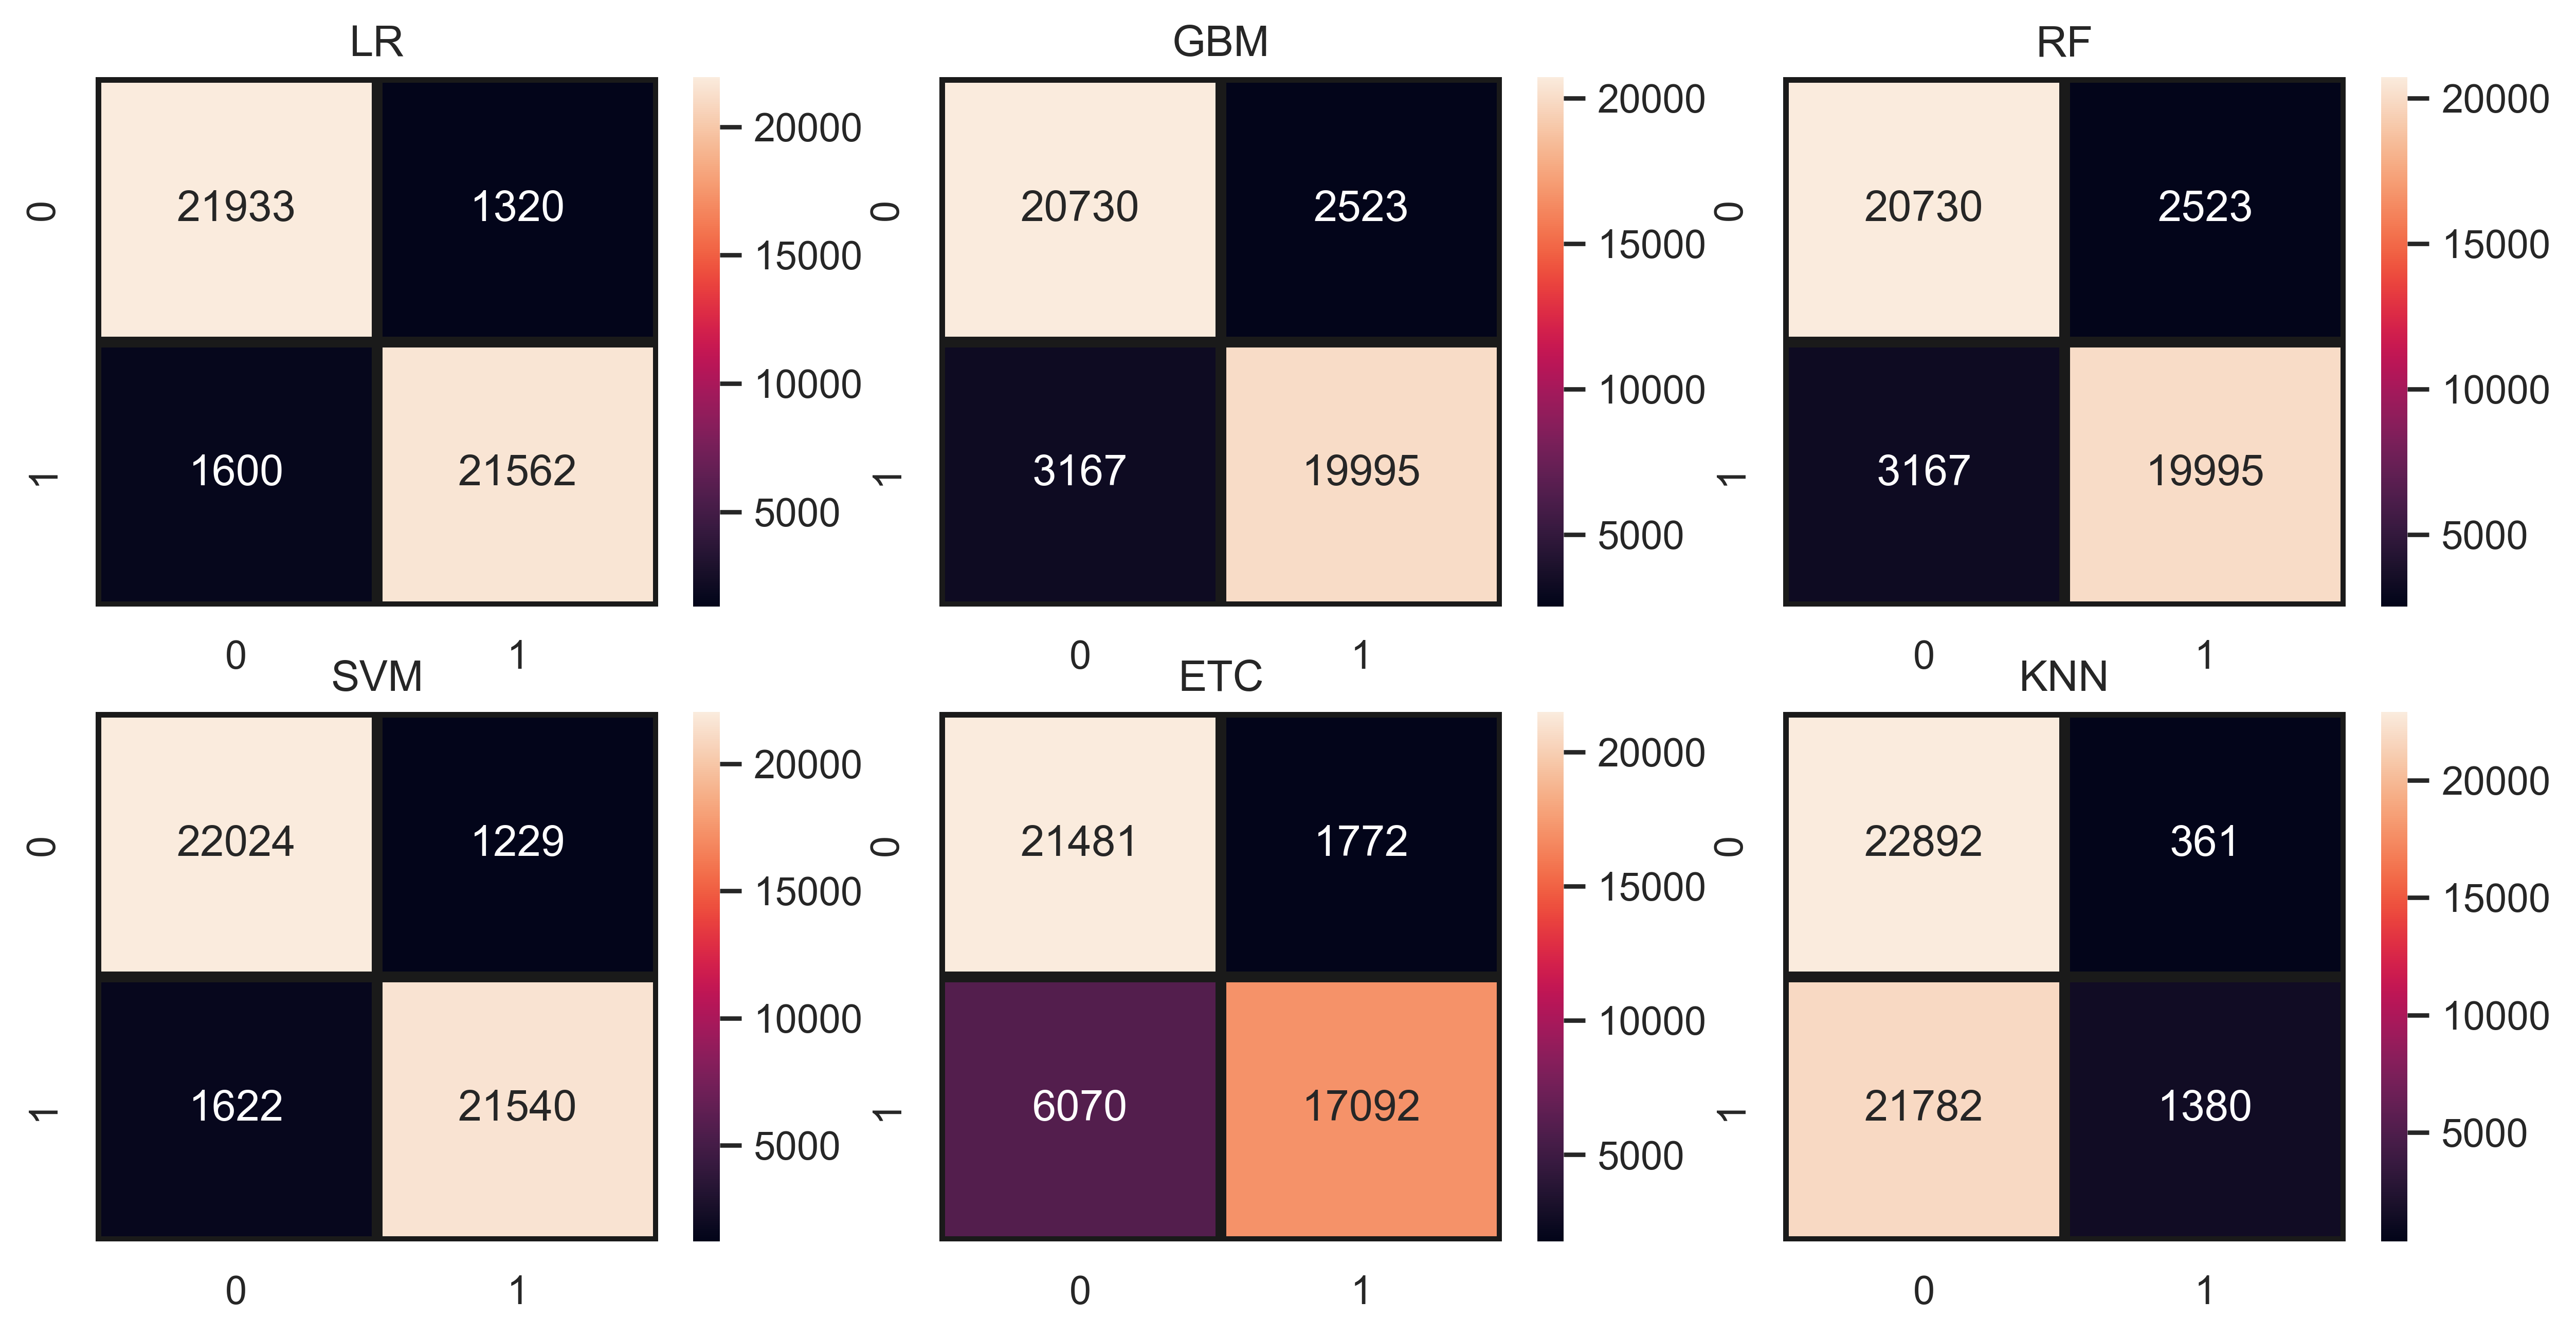

In [21]:
i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A,fontsize=12)

plt.figure(1,figsize=(12, 6),dpi=500)
plt.subplot(231) 
plot_sub_sentiment(LR,'LR')
plt.subplot(232)
plot_sub_sentiment(GBM,'GBM')
plt.subplot(233) 
plot_sub_sentiment(RF,'RF')
plt.subplot(234)
plot_sub_sentiment(SVC,'SVM')
plt.subplot(235) 
plot_sub_sentiment(ETC,'ETC')
plt.subplot(236)
plot_sub_sentiment(KNN,'KNN')

plt.savefig('confTFIDF.pdf')


# Hybrid 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["cleanText"])

In [9]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
dtP1=dt.fit(X, data["class"]).predict_proba(X)

In [ ]:
from sklearn.svm import SVC
dt = SVC(kernel='linear', probability=True)
dtP2=dt.fit(X, data["class"]).predict_proba(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=200, max_depth=50) 
dtP3=dt.fit(X, data["class"]).predict_proba(X)

In [ ]:
tf=pd.DataFrame(dtP1)
df=pd.DataFrame(dtP2)
rf=pd.DataFrame(dtP2)
result = pd.concat([tf, df,rf], axis=1).reindex(tf.index)

In [15]:
from sklearn.model_selection import train_test_split

X_1, X_2, y_1, y_2 = train_test_split(result,data['class'],test_size=0.20, random_state=200,shuffle=True)

In [16]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
dtP1=dt.fit(X_1, y_1).predict(X_2)
print(accuracy_score(y_2,dtP1))
print(classification_report(y_2,dtP1))
print(confusion_matrix(y_2,dtP1))

0.9546051922869762
              precision    recall  f1-score   support

 non-suicide       0.95      0.96      0.95     23253
     suicide       0.96      0.95      0.95     23162

    accuracy                           0.95     46415
   macro avg       0.95      0.95      0.95     46415
weighted avg       0.95      0.95      0.95     46415

[[22221  1032]
 [ 1075 22087]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=200, max_depth=200) 
dtP1=dt.fit(X_1, y_1).predict(X_2)
print(accuracy_score(y_2,dtP1))
print(classification_report(y_2,dtP1))
print(confusion_matrix(y_2,dtP1))

0.9491112786814607
              precision    recall  f1-score   support

 non-suicide       0.96      0.94      0.95     23253
     suicide       0.94      0.96      0.95     23162

    accuracy                           0.95     46415
   macro avg       0.95      0.95      0.95     46415
weighted avg       0.95      0.95      0.95     46415

[[21921  1332]
 [ 1030 22132]]


In [20]:
from sklearn.svm import LinearSVC
print("SVC")
dt = SVC(kernel='linear', probability=True)
dtP1=dt.fit(X_1, y_1).predict(X_2)
print(accuracy_score(y_2,dtP1))
print(classification_report(y_2,dtP1))
print(confusion_matrix(y_2,dtP1))

SVC
0.9552299903048583
              precision    recall  f1-score   support

 non-suicide       0.96      0.95      0.96     23253
     suicide       0.95      0.96      0.96     23162

    accuracy                           0.96     46415
   macro avg       0.96      0.96      0.96     46415
weighted avg       0.96      0.96      0.96     46415

[[22202  1051]
 [ 1027 22135]]


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)
dtP1=dt.fit(X_1, y_1).predict(X_2)
print(accuracy_score(y_2,dtP1))
print(classification_report(y_2,dtP1))
print(confusion_matrix(y_2,dtP1))

ETC
0.9504039642356996
              precision    recall  f1-score   support

 non-suicide       0.96      0.94      0.95     23253
     suicide       0.94      0.96      0.95     23162

    accuracy                           0.95     46415
   macro avg       0.95      0.95      0.95     46415
weighted avg       0.95      0.95      0.95     46415

[[21946  1307]
 [  995 22167]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
dt = KNeighborsClassifier(n_neighbors=3)
dtP1=dt.fit(X_1, y_1).predict(X_2)
print(accuracy_score(y_2,dtP1))
print(classification_report(y_2,dtP1))
print(confusion_matrix(y_2,dtP1))

0.9462889152213724
              precision    recall  f1-score   support

 non-suicide       0.95      0.94      0.95     23253
     suicide       0.94      0.95      0.95     23162

    accuracy                           0.95     46415
   macro avg       0.95      0.95      0.95     46415
weighted avg       0.95      0.95      0.95     46415

[[21889  1364]
 [ 1129 22033]]


In [22]:

from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier(max_depth=200, learning_rate=0.2, n_estimators=50, random_state=52)
dtP1=dt.fit(X_1, y_1).predict(X_2)
print(accuracy_score(y_2,dtP1))
print(classification_report(y_2,dtP1))
print(confusion_matrix(y_2,dtP1))

0.934654745233222
              precision    recall  f1-score   support

 non-suicide       0.94      0.93      0.93     23253
     suicide       0.93      0.94      0.93     23162

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

[[21664  1589]
 [ 1444 21718]]


In [22]:

array1=[[22221,  1032],
 [ 1075, 22087]]
LR = pd.DataFrame(array1, index = [i for i in "01"],
                  columns = [i for i in "01"])

array2=[[21664  ,1589],
 [ 1444 ,21718]]
GBM = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])

array3=[[21921,  1332],
 [ 1030 ,22132]]
RF = pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

array4=[[22202 , 1051],
 [ 1027, 22135]]
SVC = pd.DataFrame(array4, index = [i for i in "01"],
                  columns = [i for i in "01"])

array5=[[21946 , 1307],
 [  995, 22167]]
ETC = pd.DataFrame(array5, index = [i for i in "01"],
                  columns = [i for i in "01"])

array6=[[21889,  1364],
 [ 1129, 22033]]
KNN = pd.DataFrame(array6, index = [i for i in "01"],
                  columns = [i for i in "01"])

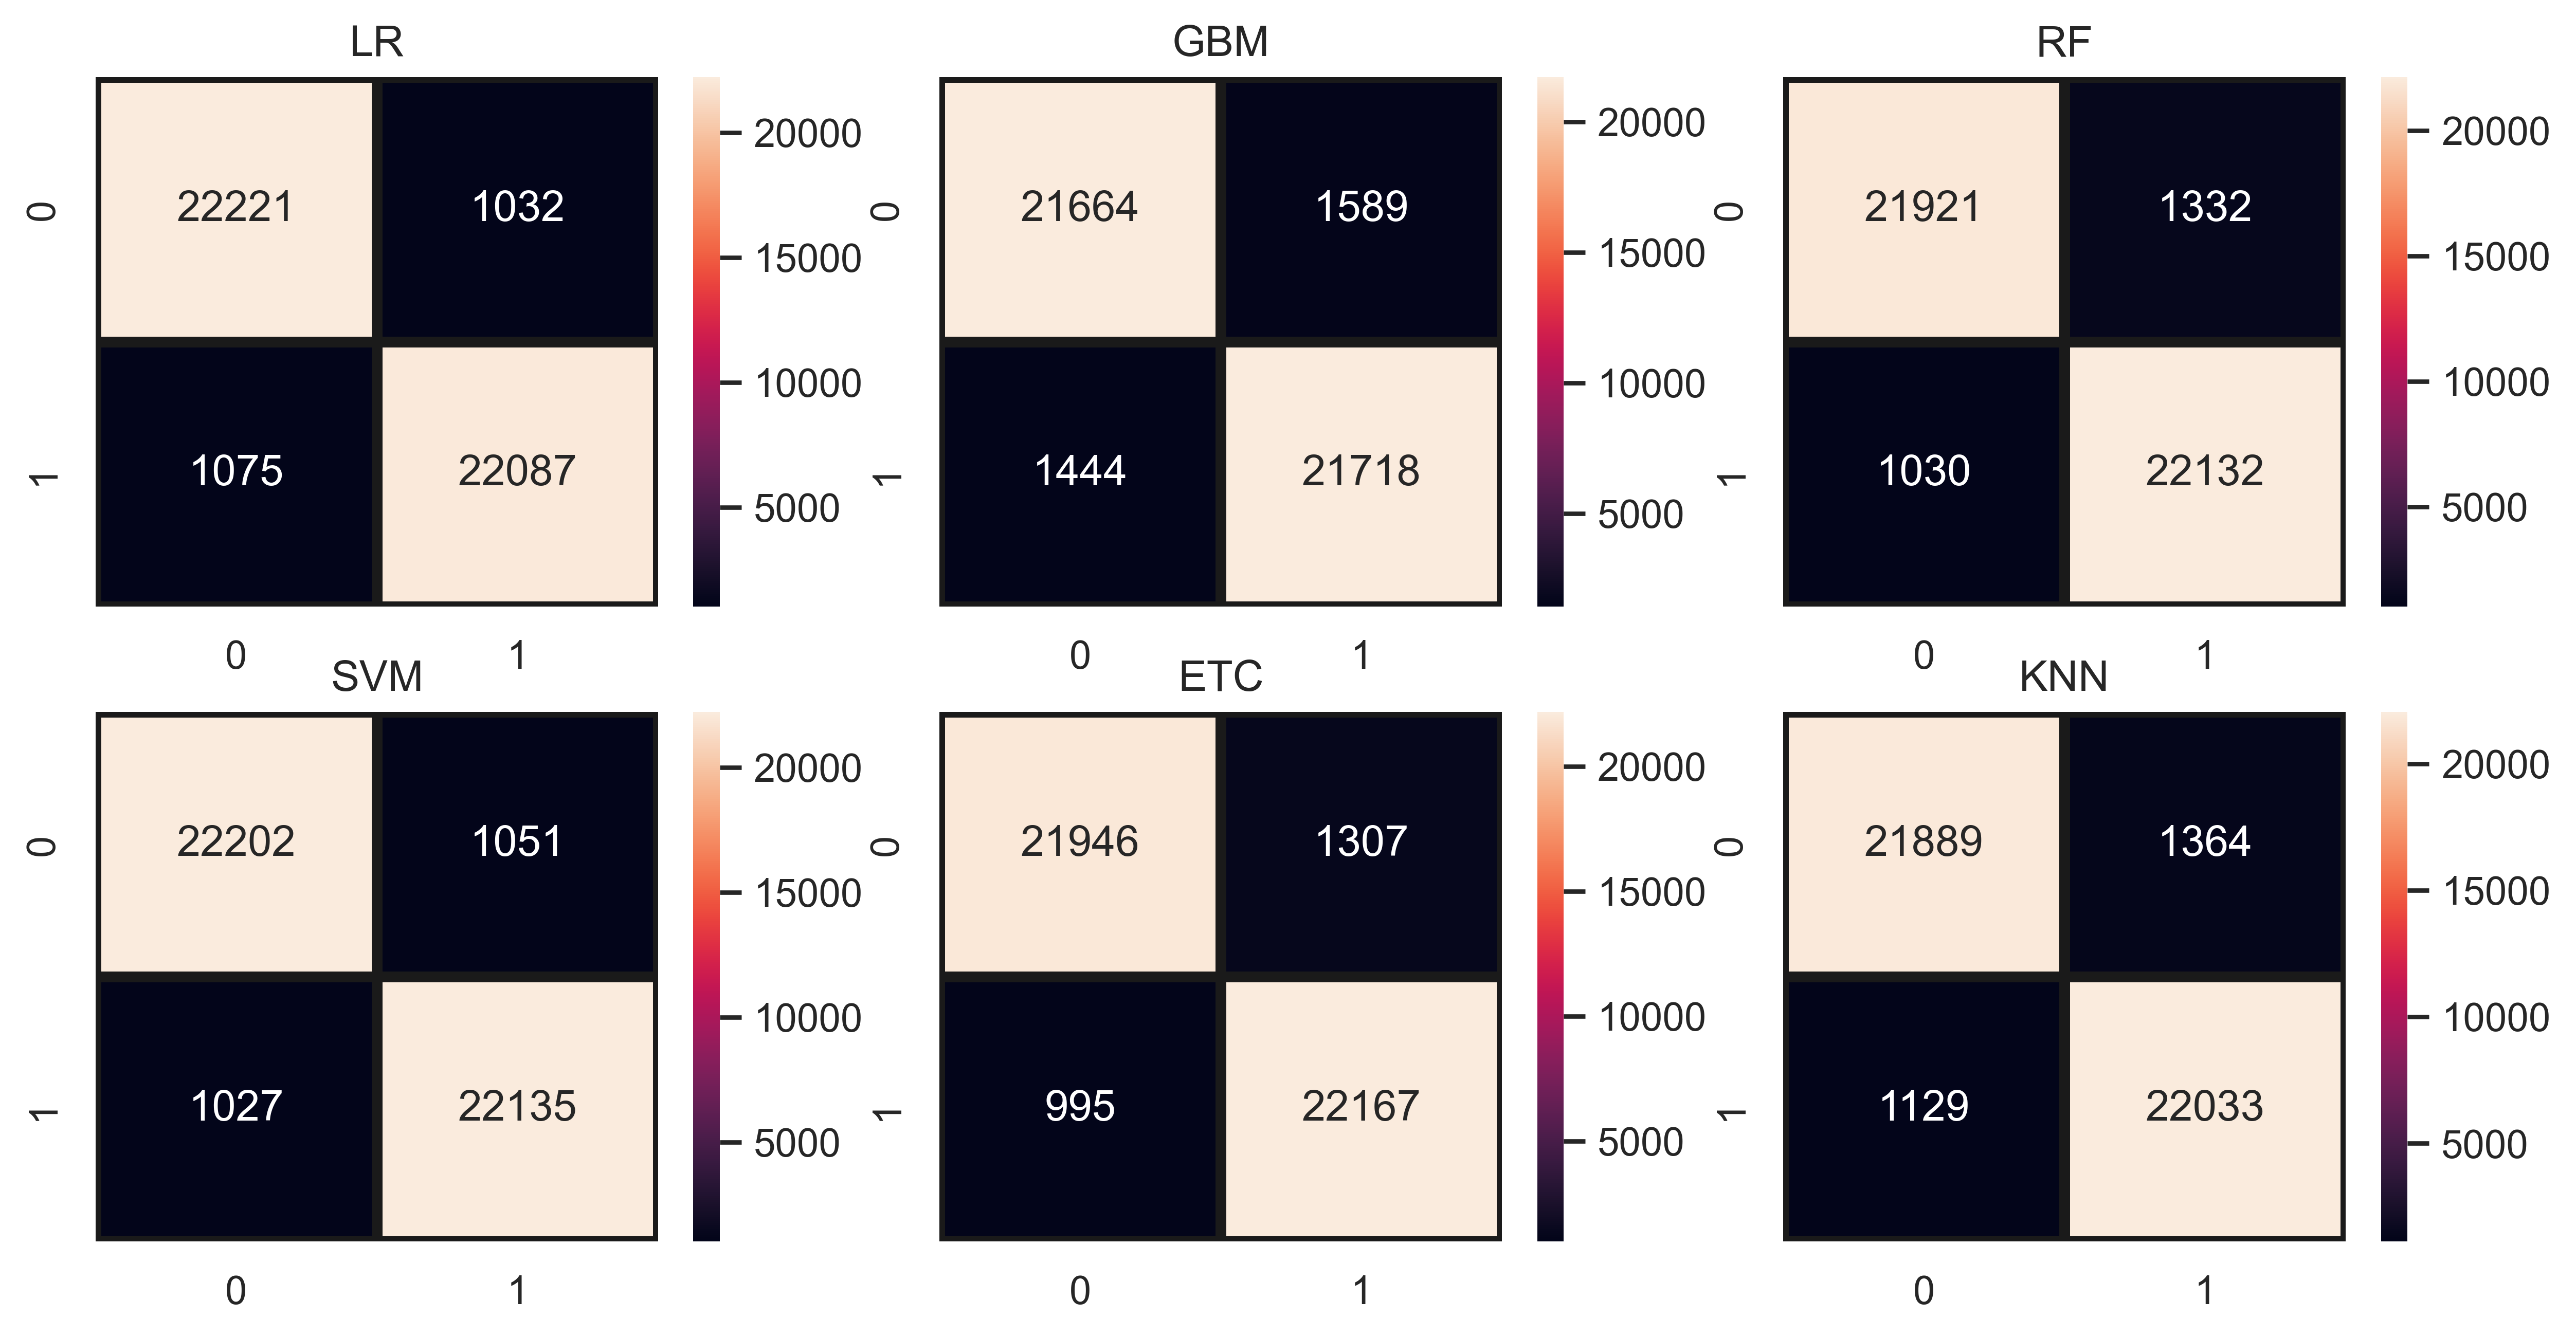

In [23]:
i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A,fontsize=12)

plt.figure(1,figsize=(12, 6),dpi=500)
plt.subplot(231) 
plot_sub_sentiment(LR,'LR')
plt.subplot(232)
plot_sub_sentiment(GBM,'GBM')
plt.subplot(233) 
plot_sub_sentiment(RF,'RF')
plt.subplot(234)
plot_sub_sentiment(SVC,'SVM')
plt.subplot(235) 
plot_sub_sentiment(ETC,'ETC')
plt.subplot(236)
plot_sub_sentiment(KNN,'KNN')

plt.savefig('confHYBRID.pdf')


# Hashing

In [175]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
dtP1=dt.fit(X2, y_train).predict(y2)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.9341376710115264
              precision    recall  f1-score   support

 non-suicide       0.93      0.94      0.93     23253
     suicide       0.94      0.93      0.93     23162

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

[[21848  1405]
 [ 1652 21510]]


In [176]:

from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier(max_depth=200, learning_rate=0.2, n_estimators=50, random_state=52)
dtP1=dt.fit(X2, y_train).predict(y2)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.8767855219217925
              precision    recall  f1-score   support

 non-suicide       0.87      0.89      0.88     23253
     suicide       0.89      0.86      0.87     23162

    accuracy                           0.88     46415
   macro avg       0.88      0.88      0.88     46415
weighted avg       0.88      0.88      0.88     46415

[[20733  2520]
 [ 3199 19963]]


In [177]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=200, max_depth=50) 
dtP1=dt.fit(X2, y_train).predict(y2)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.8252289130668965
              precision    recall  f1-score   support

 non-suicide       0.78      0.91      0.84     23253
     suicide       0.89      0.74      0.81     23162

    accuracy                           0.83     46415
   macro avg       0.83      0.83      0.82     46415
weighted avg       0.83      0.83      0.82     46415

[[21104  2149]
 [ 5963 17199]]


In [178]:
from sklearn.svm import LinearSVC
print("SVC")
dt = LinearSVC()
dtP1=dt.fit(X2, y_train).predict(y2)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

SVC
0.9369815792308521
              precision    recall  f1-score   support

 non-suicide       0.93      0.94      0.94     23253
     suicide       0.94      0.93      0.94     23162

    accuracy                           0.94     46415
   macro avg       0.94      0.94      0.94     46415
weighted avg       0.94      0.94      0.94     46415

[[21931  1322]
 [ 1603 21559]]


In [179]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)
dtP1=dt.fit(X2, y_train).predict(y2)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

ETC
0.8348594204459765
              precision    recall  f1-score   support

 non-suicide       0.79      0.91      0.85     23253
     suicide       0.90      0.76      0.82     23162

    accuracy                           0.83     46415
   macro avg       0.84      0.83      0.83     46415
weighted avg       0.84      0.83      0.83     46415

[[21235  2018]
 [ 5647 17515]]


In [180]:
from sklearn.neighbors import KNeighborsClassifier
dt = KNeighborsClassifier(n_neighbors=3)
dtP1=dt.fit(X2, y_train).predict(y2)
print(accuracy_score(y_test,dtP1))
print(classification_report(y_test,dtP1))
print(confusion_matrix(y_test,dtP1))

0.620963050737908
              precision    recall  f1-score   support

 non-suicide       0.57      0.95      0.71     23253
     suicide       0.85      0.29      0.44     23162

    accuracy                           0.62     46415
   macro avg       0.71      0.62      0.58     46415
weighted avg       0.71      0.62      0.58     46415

[[22034  1219]
 [16374  6788]]


In [24]:

array1=[[21848  ,1405],
 [ 1652 ,21510]]
LR = pd.DataFrame(array1, index = [i for i in "01"],
                  columns = [i for i in "01"])

array2=[[20733 , 2520],
 [ 3199 ,19963]]
GBM = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])

array3=[[21104 , 2149],
 [ 5963, 17199]]
RF = pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

array4=[[21931 , 1322],
 [ 1603, 21559]]
SVC = pd.DataFrame(array4, index = [i for i in "01"],
                  columns = [i for i in "01"])

array5=[[22034 , 1219],
 [16374 , 6788]]
ETC = pd.DataFrame(array5, index = [i for i in "01"],
                  columns = [i for i in "01"])

array6=[[22034 , 1219],
 [16374,  6788]]
KNN = pd.DataFrame(array6, index = [i for i in "01"],
                  columns = [i for i in "01"])

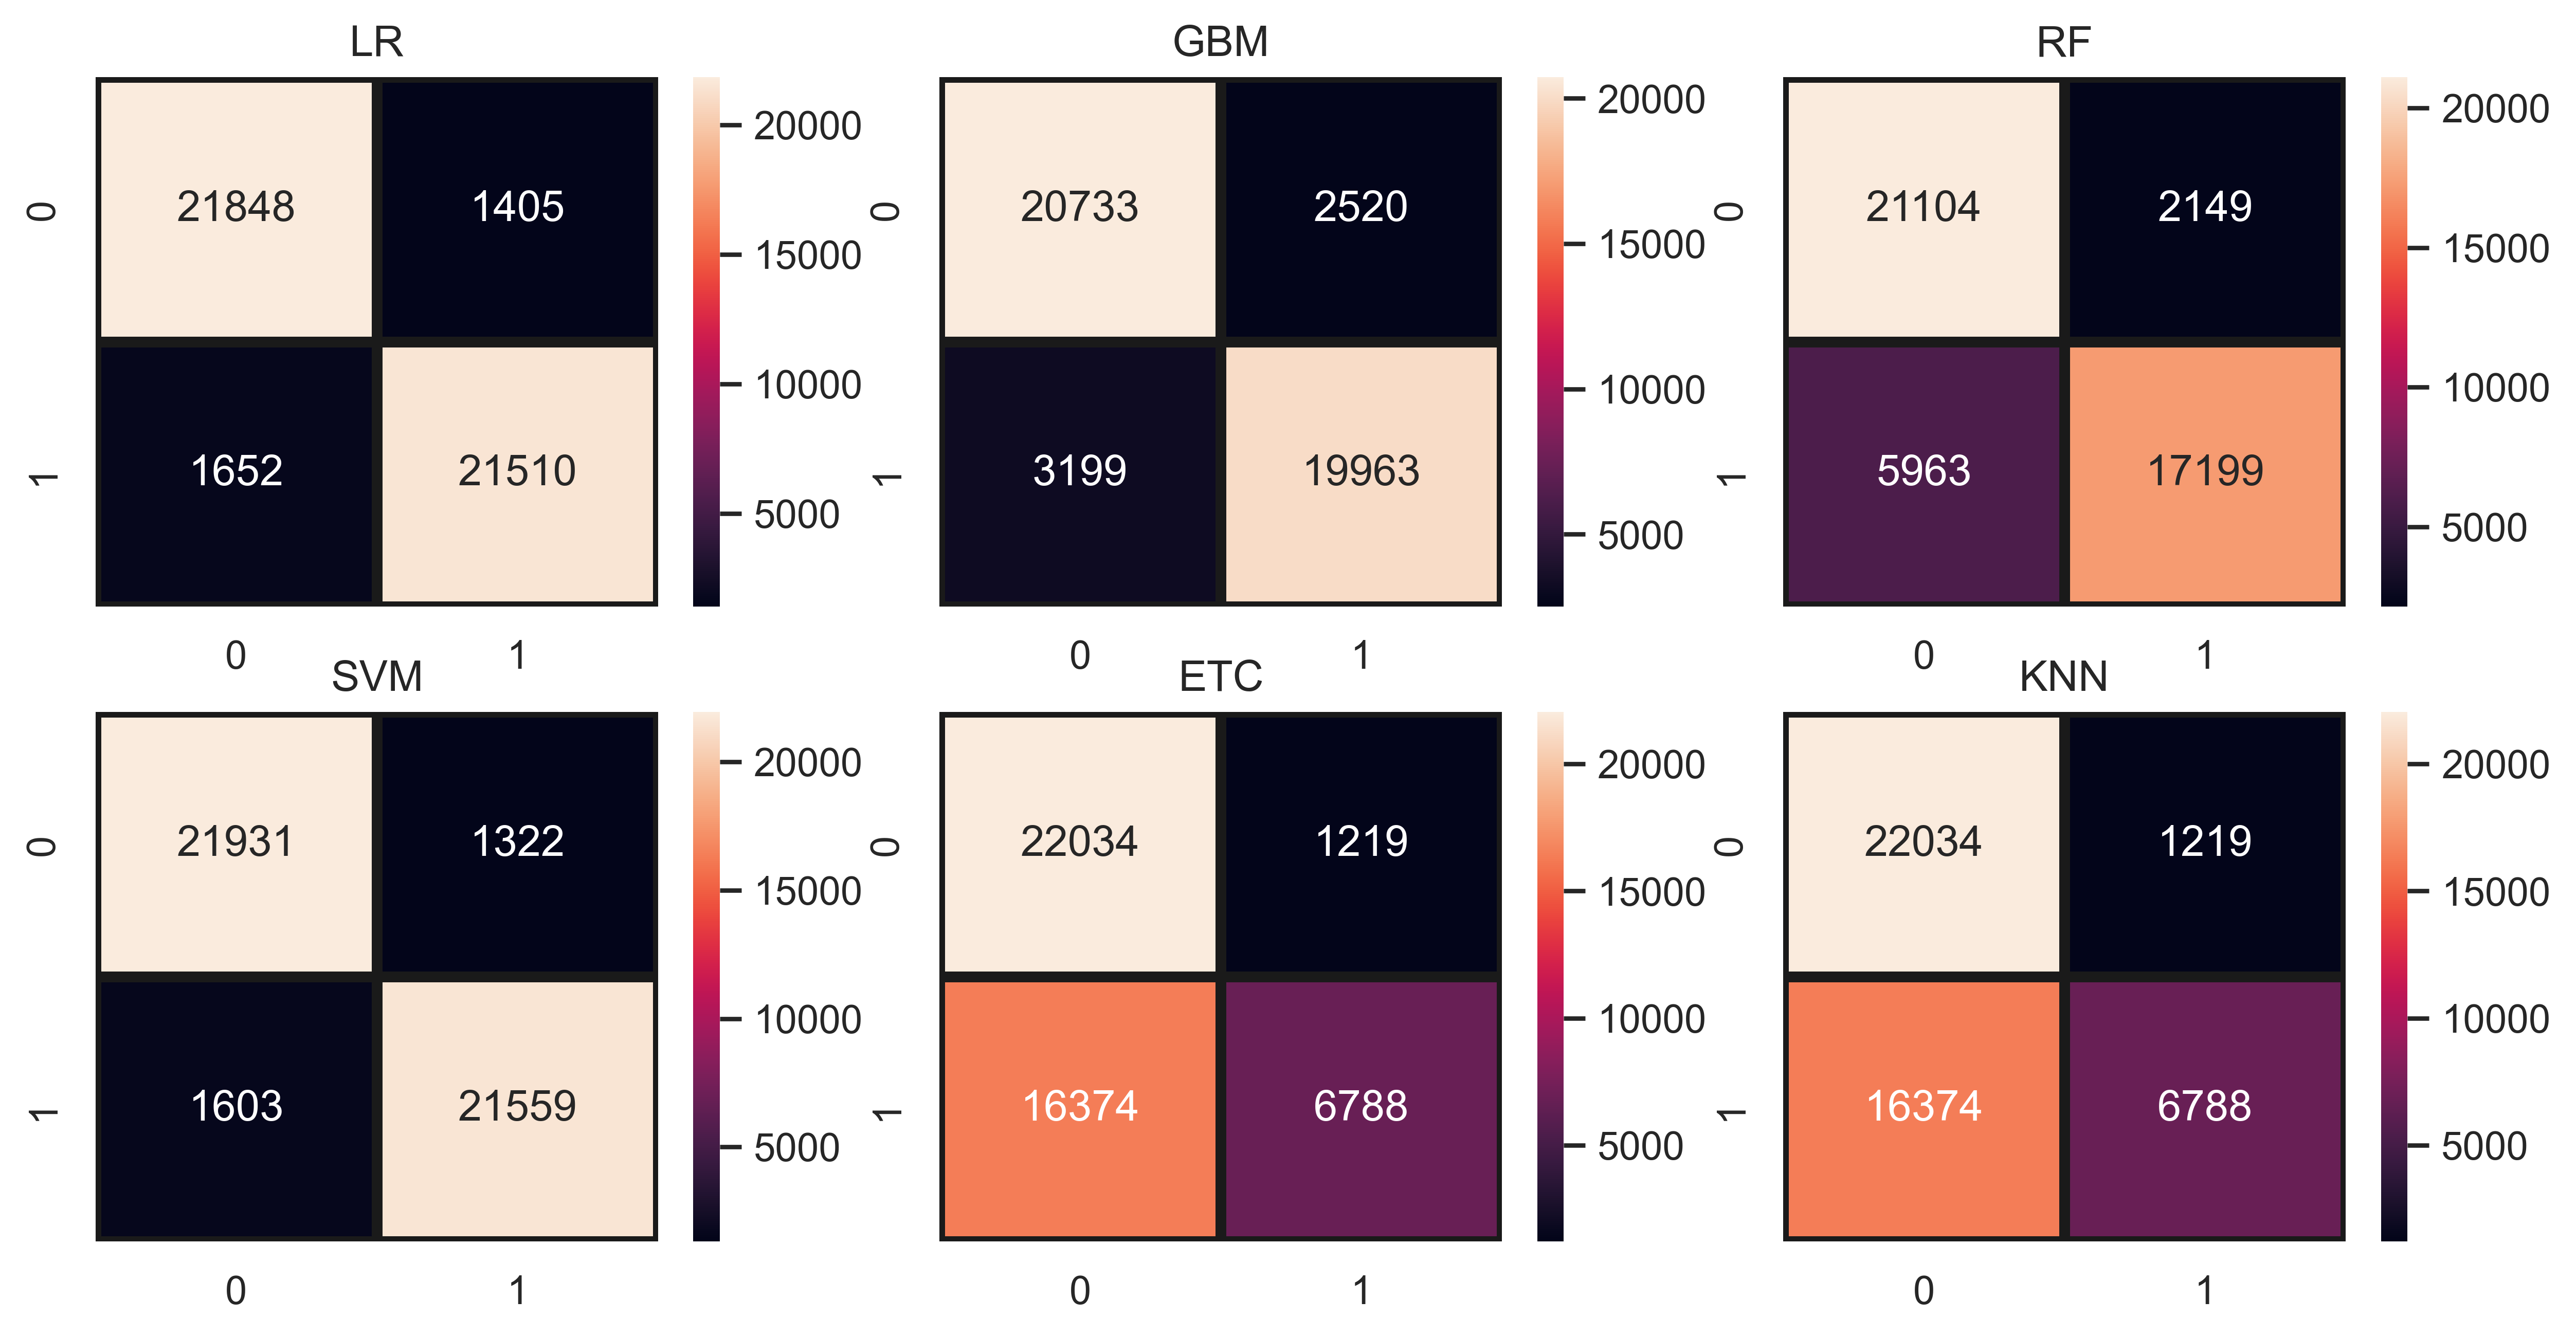

In [25]:
i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A,fontsize=12)

plt.figure(1,figsize=(12, 6),dpi=500)
plt.subplot(231) 
plot_sub_sentiment(LR,'LR')
plt.subplot(232)
plot_sub_sentiment(GBM,'GBM')
plt.subplot(233) 
plot_sub_sentiment(RF,'RF')
plt.subplot(234)
plot_sub_sentiment(SVC,'SVM')
plt.subplot(235) 
plot_sub_sentiment(ETC,'ETC')
plt.subplot(236)
plot_sub_sentiment(KNN,'KNN')

plt.savefig('confHashing.pdf')


# Chi2

In [23]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_kbest_features1,data['class'],test_size=0.20, random_state=200,shuffle=True)

In [24]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9263169234083809
              precision    recall  f1-score   support

 non-suicide       0.91      0.95      0.93     23253
     suicide       0.95      0.90      0.92     23162

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

[[22123  1130]
 [ 2290 20872]]


In [25]:

from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier(max_depth=200, learning_rate=0.2, n_estimators=50, random_state=52)
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

0.8748034040719594
              precision    recall  f1-score   support

 non-suicide       0.87      0.89      0.88     23253
     suicide       0.88      0.86      0.87     23162

    accuracy                           0.87     46415
   macro avg       0.88      0.87      0.87     46415
weighted avg       0.88      0.87      0.87     46415

[[20617  2636]
 [ 3175 19987]]


In [26]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=200, max_depth=50) 
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

0.8824517936012065
              precision    recall  f1-score   support

 non-suicide       0.87      0.90      0.88     23253
     suicide       0.89      0.87      0.88     23162

    accuracy                           0.88     46415
   macro avg       0.88      0.88      0.88     46415
weighted avg       0.88      0.88      0.88     46415

[[20890  2363]
 [ 3093 20069]]


In [27]:
from sklearn.svm import LinearSVC
print("SVC")
dt = LinearSVC()
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

SVC


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9231282990412583
              precision    recall  f1-score   support

 non-suicide       0.91      0.95      0.92     23253
     suicide       0.94      0.90      0.92     23162

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415

[[21981  1272]
 [ 2296 20866]]


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

ETC
0.7860174512549822
              precision    recall  f1-score   support

 non-suicide       0.72      0.93      0.81     23253
     suicide       0.90      0.64      0.75     23162

    accuracy                           0.79     46415
   macro avg       0.81      0.79      0.78     46415
weighted avg       0.81      0.79      0.78     46415

[[21569  1684]
 [ 8248 14914]]


In [29]:
from sklearn.neighbors import KNeighborsClassifier
dt = KNeighborsClassifier(n_neighbors=3)
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

0.7478185931272218
              precision    recall  f1-score   support

 non-suicide       0.71      0.84      0.77     23253
     suicide       0.81      0.65      0.72     23162

    accuracy                           0.75     46415
   macro avg       0.76      0.75      0.75     46415
weighted avg       0.76      0.75      0.75     46415

[[19604  3649]
 [ 8056 15106]]


In [26]:

array1=[[22123 , 1130],
 [ 2290, 20872]]
LR = pd.DataFrame(array1, index = [i for i in "01"],
                  columns = [i for i in "01"])

array2=[[20617,  2636],
 [ 3175, 19987]]
GBM = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])

array3=[[20890 , 2363],
 [ 3093, 20069]]
RF = pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

array4=[[21981 , 1272],
 [ 2296, 20866]]
SVC = pd.DataFrame(array4, index = [i for i in "01"],
                  columns = [i for i in "01"])

array5=[[21569 , 1684],
 [ 8248 ,14914]]
ETC = pd.DataFrame(array5, index = [i for i in "01"],
                  columns = [i for i in "01"])

array6=[[19604 , 3649],
 [ 8056, 15106]]
KNN = pd.DataFrame(array6, index = [i for i in "01"],
                  columns = [i for i in "01"])

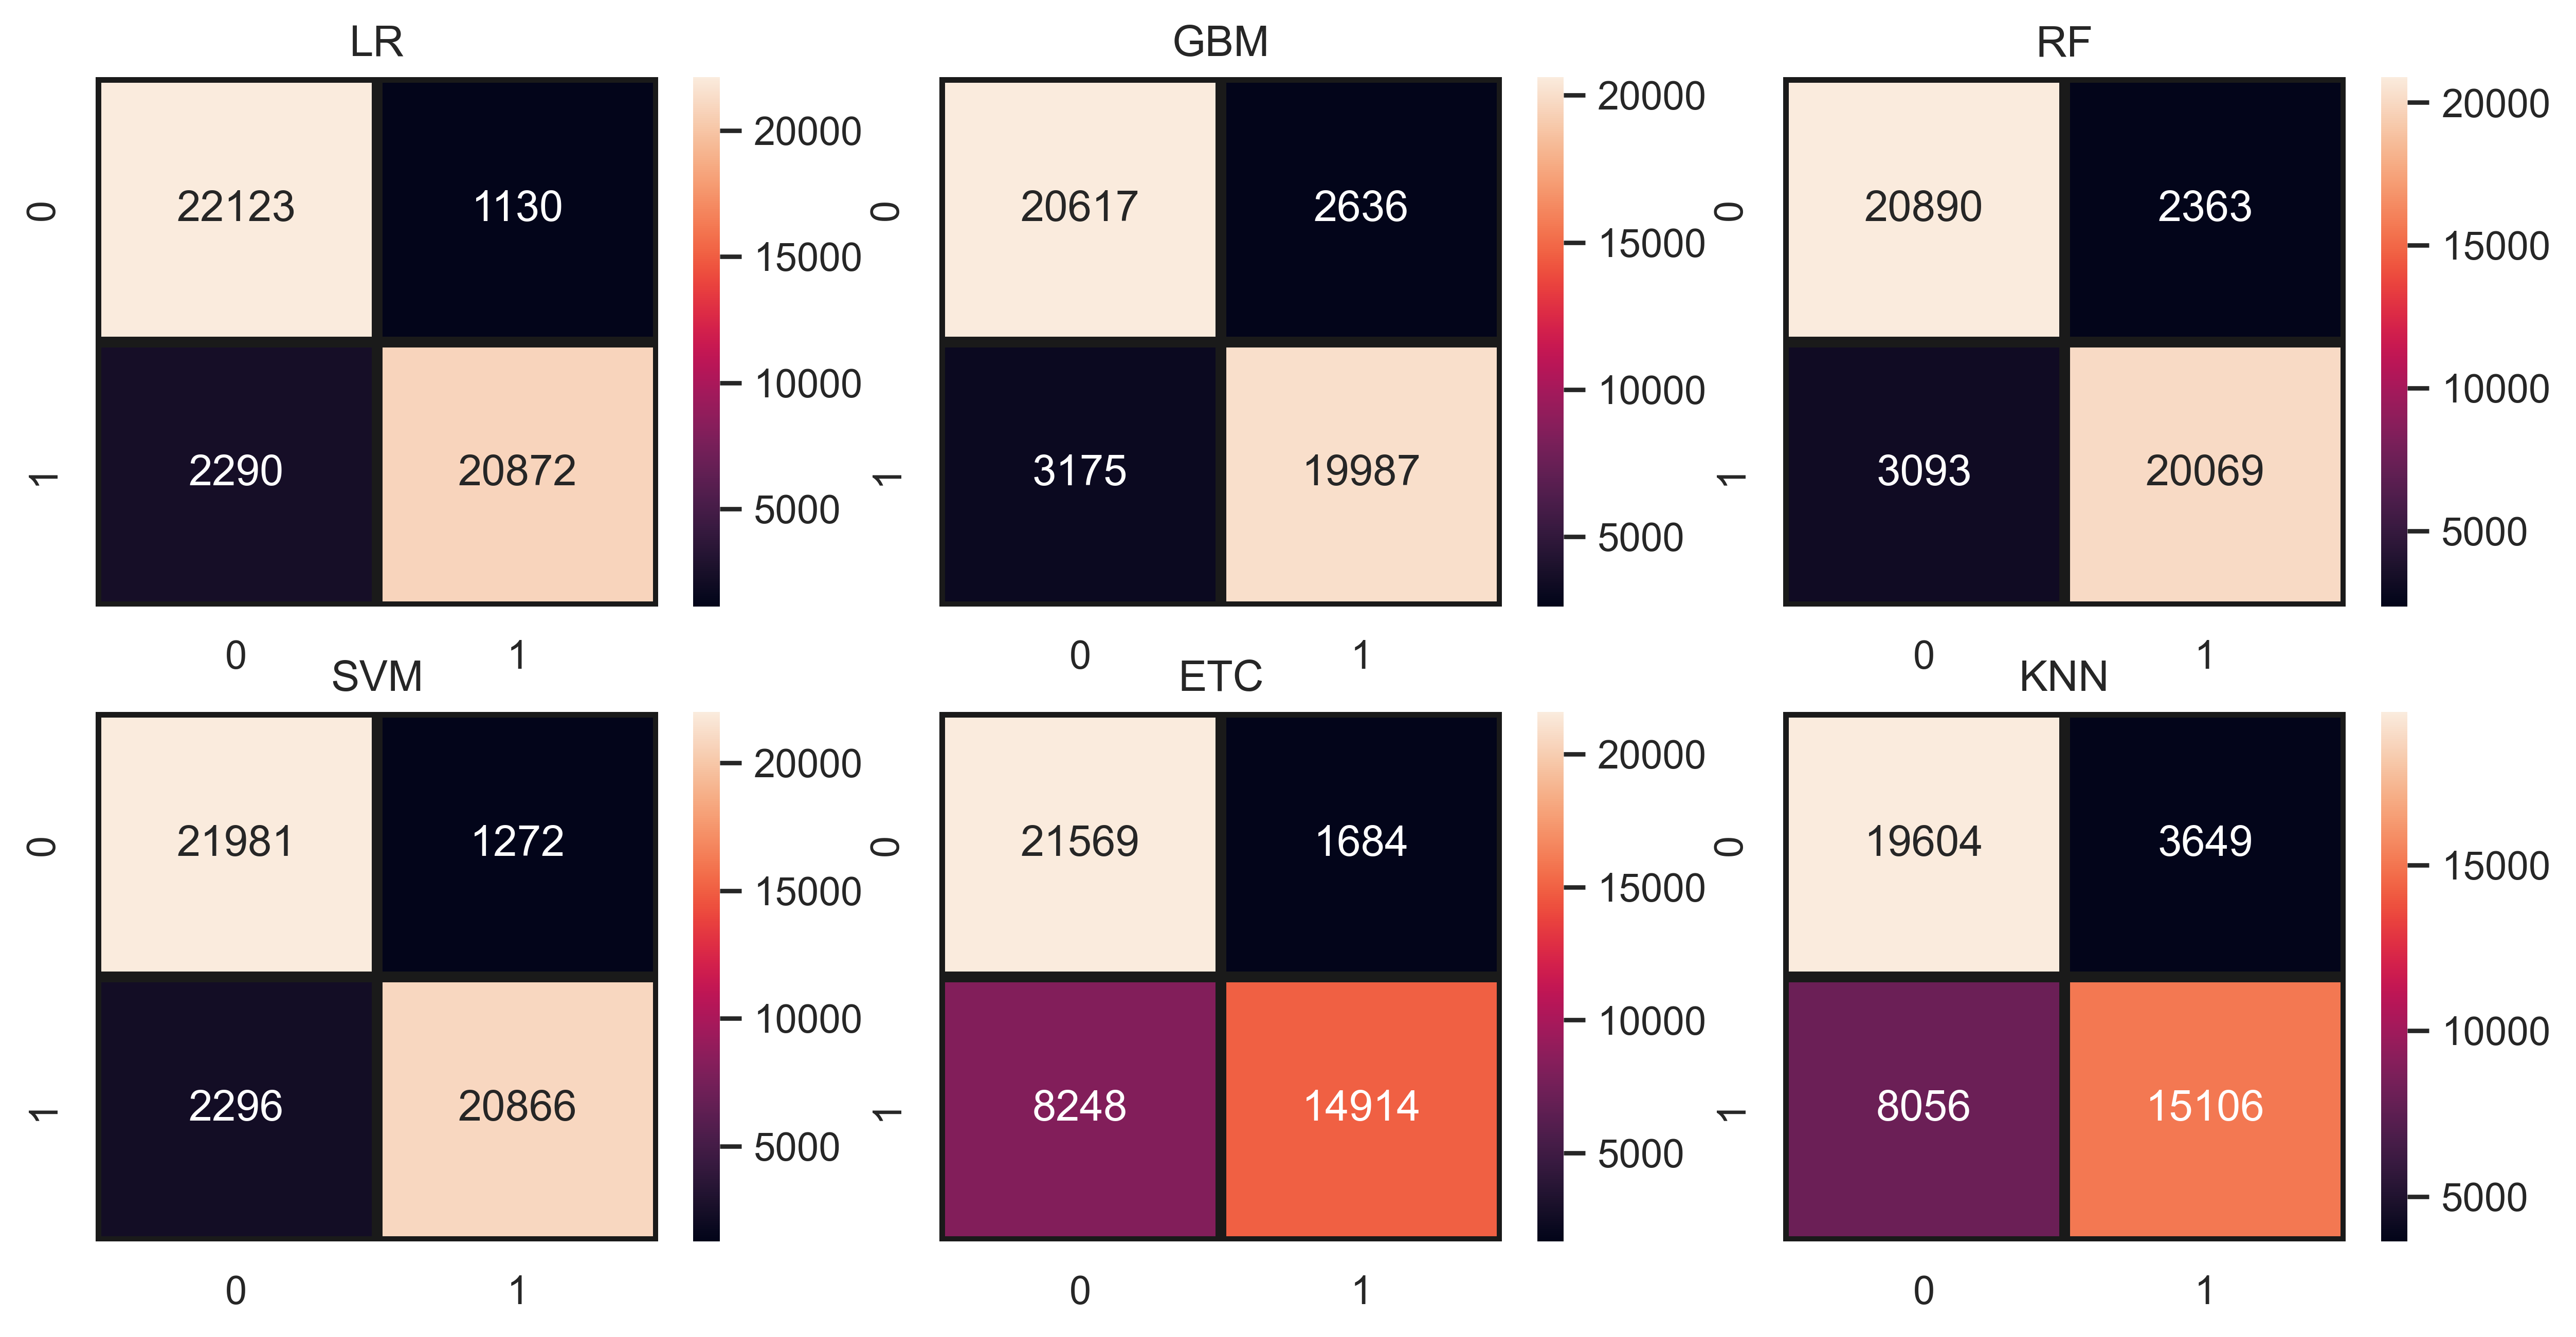

In [27]:
i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A,fontsize=12)

plt.figure(1,figsize=(12, 6),dpi=500)
plt.subplot(231) 
plot_sub_sentiment(LR,'LR')
plt.subplot(232)
plot_sub_sentiment(GBM,'GBM')
plt.subplot(233) 
plot_sub_sentiment(RF,'RF')
plt.subplot(234)
plot_sub_sentiment(SVC,'SVM')
plt.subplot(235) 
plot_sub_sentiment(ETC,'ETC')
plt.subplot(236)
plot_sub_sentiment(KNN,'KNN')

plt.savefig('confChi2.pdf')


# PCA

In [13]:
Xf1=Xf1.astype(int)
from sklearn.decomposition import TruncatedSVD 
pca = TruncatedSVD (n_components=1000)  
pcaf = pca.fit_transform(Xf1)

In [19]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(pcaf,data['class'],test_size=0.20, random_state=200,shuffle=True)

In [20]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9156307228266725
              precision    recall  f1-score   support

 non-suicide       0.89      0.95      0.92     23253
     suicide       0.94      0.89      0.91     23162

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415

[[21988  1265]
 [ 2651 20511]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=200, max_depth=50) 
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

0.8598728859204998
              precision    recall  f1-score   support

 non-suicide       0.87      0.85      0.86     23253
     suicide       0.85      0.87      0.86     23162

    accuracy                           0.86     46415
   macro avg       0.86      0.86      0.86     46415
weighted avg       0.86      0.86      0.86     46415

[[19815  3438]
 [ 3066 20096]]


In [22]:
from sklearn.svm import LinearSVC
print("SVC")
dt = LinearSVC()
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

SVC


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9116664871270064
              precision    recall  f1-score   support

 non-suicide       0.88      0.95      0.92     23253
     suicide       0.95      0.87      0.91     23162

    accuracy                           0.91     46415
   macro avg       0.91      0.91      0.91     46415
weighted avg       0.91      0.91      0.91     46415

[[22097  1156]
 [ 2944 20218]]


In [23]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=200, random_state=5, max_depth=20)
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

ETC
0.7894646127329528
              precision    recall  f1-score   support

 non-suicide       0.77      0.83      0.80     23253
     suicide       0.81      0.75      0.78     23162

    accuracy                           0.79     46415
   macro avg       0.79      0.79      0.79     46415
weighted avg       0.79      0.79      0.79     46415

[[19234  4019]
 [ 5753 17409]]


In [24]:
from sklearn.neighbors import KNeighborsClassifier
dt = KNeighborsClassifier(n_neighbors=3)
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

0.7734568566196273
              precision    recall  f1-score   support

 non-suicide       0.72      0.91      0.80     23253
     suicide       0.88      0.64      0.74     23162

    accuracy                           0.77     46415
   macro avg       0.80      0.77      0.77     46415
weighted avg       0.80      0.77      0.77     46415

[[21155  2098]
 [ 8417 14745]]


In [25]:

from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier(max_depth=200, learning_rate=0.2, n_estimators=50, random_state=52)
dtP1=dt.fit(X_train1, y_train1).predict(X_test1)
print(accuracy_score(y_test1,dtP1))
print(classification_report(y_test1,dtP1))
print(confusion_matrix(y_test1,dtP1))

KeyboardInterrupt: 

In [28]:

array1=[[21988 , 1265],
 [ 2651, 20511]]
LR = pd.DataFrame(array1, index = [i for i in "01"],
                  columns = [i for i in "01"])

array2=[[19815 , 3438],
 [ 3066, 20096]]
GBM = pd.DataFrame(array2, index = [i for i in "01"],
                  columns = [i for i in "01"])

array3=[[19815 , 3438],
 [ 3066, 20096]]
RF = pd.DataFrame(array3, index = [i for i in "01"],
                  columns = [i for i in "01"])

array4=[[22097  ,1156],
 [ 2944, 20218]]
SVC = pd.DataFrame(array4, index = [i for i in "01"],
                  columns = [i for i in "01"])

array5=[[21155 , 2098],
 [ 8417 ,14745]]
ETC = pd.DataFrame(array5, index = [i for i in "01"],
                  columns = [i for i in "01"])

array6=[[21155 , 2098],
 [ 8417, 14745]]
KNN = pd.DataFrame(array6, index = [i for i in "01"],
                  columns = [i for i in "01"])

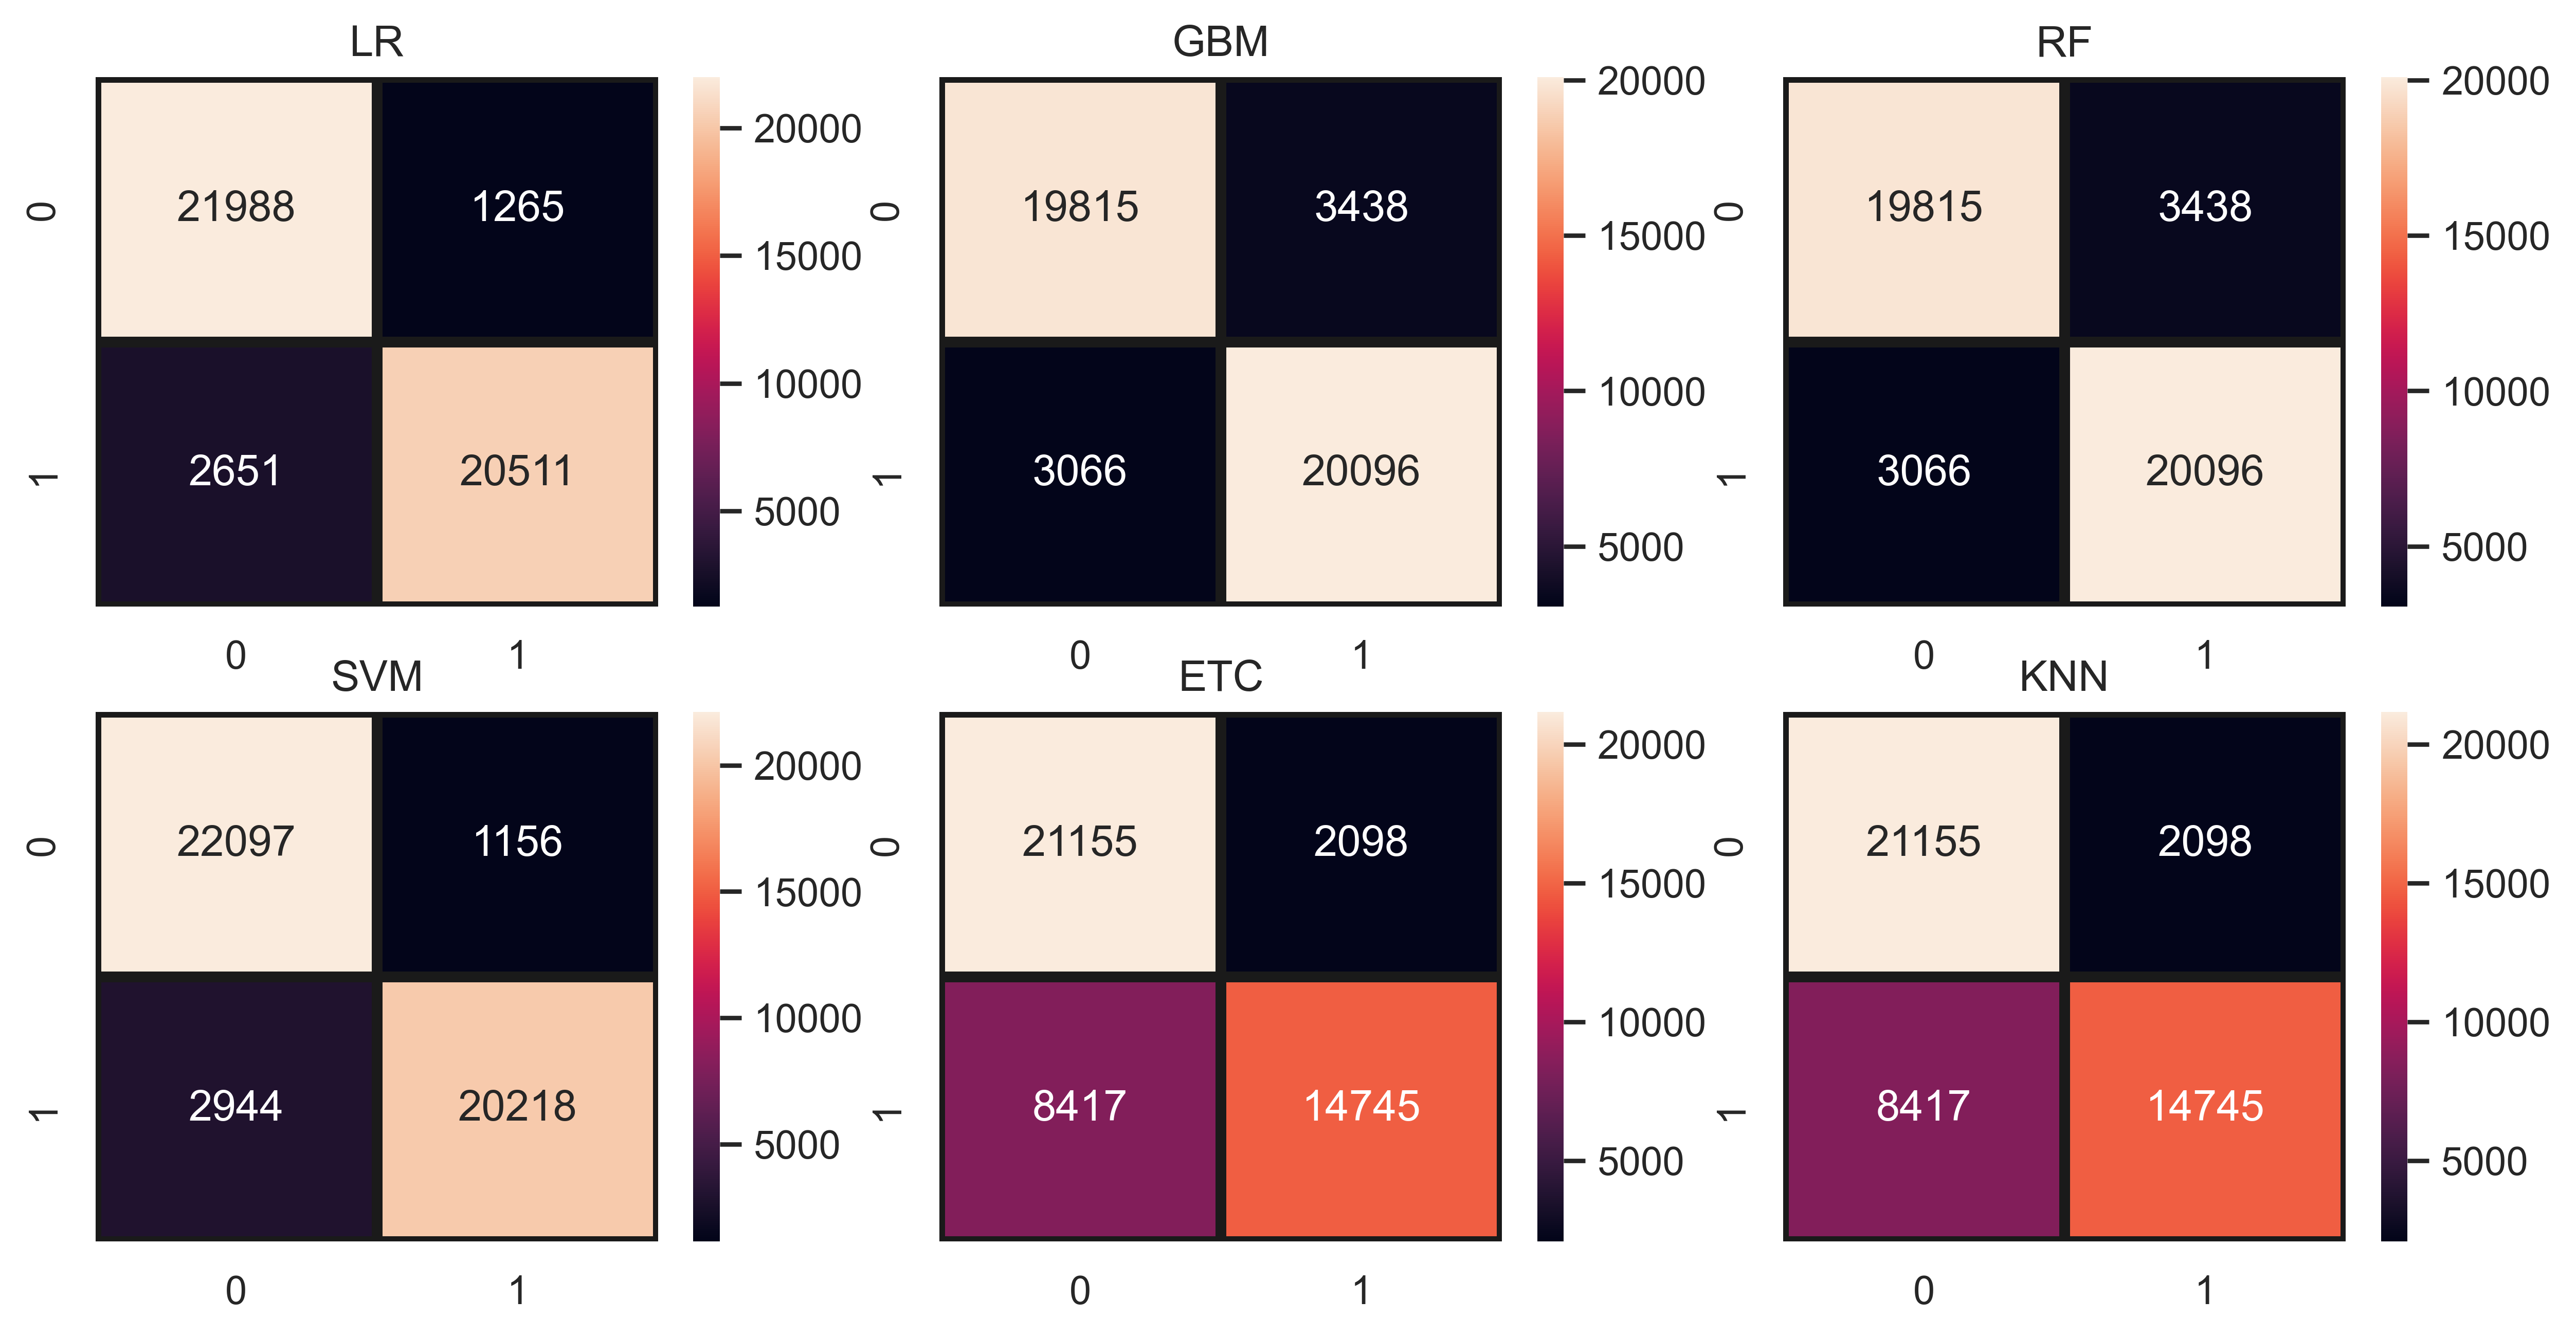

In [29]:
i=1
def plot_sub_sentiment(Airline,A):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title(A,fontsize=12)

plt.figure(1,figsize=(12, 6),dpi=500)
plt.subplot(231) 
plot_sub_sentiment(LR,'LR')
plt.subplot(232)
plot_sub_sentiment(GBM,'GBM')
plt.subplot(233) 
plot_sub_sentiment(RF,'RF')
plt.subplot(234)
plot_sub_sentiment(SVC,'SVM')
plt.subplot(235) 
plot_sub_sentiment(ETC,'ETC')
plt.subplot(236)
plot_sub_sentiment(KNN,'KNN')

plt.savefig('confPCA.pdf')


In [68]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  
# Create features and target
X = result
y =  y
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = pca.fit_transform(X)

data['pca-1'] = X_kbest_features[:,0]
data['pca-2'] = X_kbest_features[:,1] 
data['pca-3'] = X_kbest_features[:,2] 

In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(data["class"])

C:\Users\SOHAIL~1\AppData\Local\Temp/ipykernel_1472/2066256971.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure(figsize=(5, 4), dpi=300).gca(projection='3d')


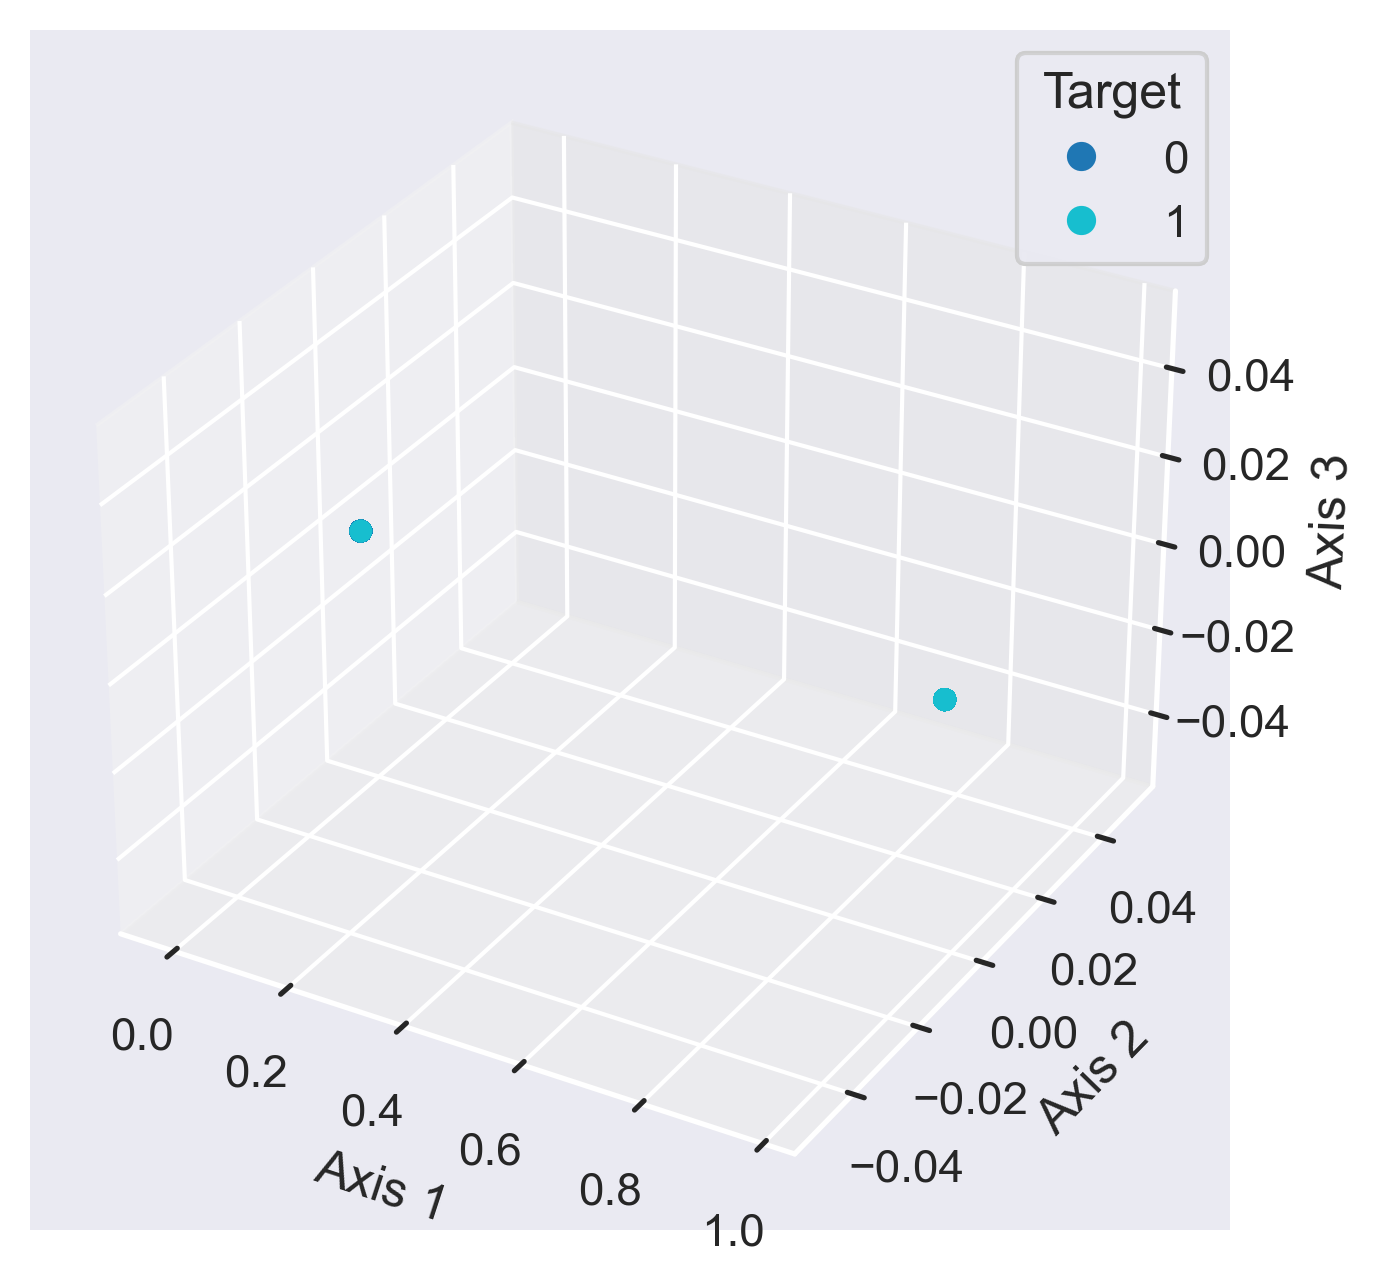

In [70]:
threedee = plt.figure(figsize=(5, 4), dpi=300).gca(projection='3d')
import numpy as np
# Creating color map
my_cmap = plt.get_cmap('tab10')
scatter= threedee.scatter(data['pca-1'],data['pca-2'],data['pca-3'],c=y, alpha=1.0, marker=r'o', cmap = my_cmap)
threedee.set_xlabel('Axis 1')
threedee.set_ylabel('Axis 2')
threedee.set_zlabel('Axis 3')
legend1 = threedee.legend(*scatter.legend_elements(),  title="Target")
threedee.add_artist(legend1)
plt.tight_layout(pad=0)
plt.savefig('featureImp40.pdf')
plt.show()

# Deep Learning

In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Lambda, Dot, Concatenate,Dropout, Activation

from tensorflow.keras import backend as K

tf.keras.backend.clear_session()

In [7]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [8]:
from keras import optimizers
import tensorflow.keras
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=5000, lower=True,split=' ',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(data["cleanText"].values)
#print(tokenizer.word_index)  # To see the dicstionary
X = tokenizer.texts_to_sequences(data["cleanText"].values)
X = tensorflow.keras.preprocessing.sequence.pad_sequences(X)

Y = pd.get_dummies(data["class"]).values

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.20, random_state =2)
batch_size=128

In [ ]:

#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(5000,100, input_length=X.shape[1]))
model_conv.add(Conv1D(128, 3, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=3))
model_conv.add(Activation('relu'))
model_conv.add(Dropout(rate=0.5))
model_conv.add(Flatten())
model_conv.add(Dense(32))
model_conv.add(Dense(2, activation='softmax'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
pred=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred

Epoch 1/100
1451/1451 - 3211s - loss: 0.2465 - accuracy: 0.9063 - mae: 0.1095 - mse: 0.0744 - precision: 0.8593 - recall: 0.8910 - f1_score: 0.8745 - val_loss: 0.2038 - val_accuracy: 0.9267 - val_mae: 0.0851 - val_mse: 0.0586 - val_precision: 0.8940 - val_recall: 0.9274 - val_f1_score: 0.9104 - 3211s/epoch - 2s/step
Epoch 2/100
1451/1451 - 3223s - loss: 0.1902 - accuracy: 0.9280 - mae: 0.0831 - mse: 0.0569 - precision: 0.9011 - recall: 0.9328 - f1_score: 0.9167 - val_loss: 0.1991 - val_accuracy: 0.9250 - val_mae: 0.0874 - val_mse: 0.0595 - val_precision: 0.9043 - val_recall: 0.9364 - val_f1_score: 0.9201 - 3223s/epoch - 2s/step
Epoch 3/100
1451/1451 - 3251s - loss: 0.1677 - accuracy: 0.9368 - mae: 0.0735 - mse: 0.0502 - precision: 0.9075 - recall: 0.9397 - f1_score: 0.9233 - val_loss: 0.2017 - val_accuracy: 0.9247 - val_mae: 0.0857 - val_mse: 0.0604 - val_precision: 0.9099 - val_recall: 0.9415 - val_f1_score: 0.9254 - 3251s/epoch - 2s/step
Epoch 4/100
1451/1451 - 3241s - loss: 0.1478 -

In [74]:
predict_x=model_conv.predict(X_valid) 
classes_x=np.argmax(predict_x,axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,classes_x))
print(confusion_matrix(rounded_labels,classes_x))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69     23123
           1       1.00      0.12      0.22     23292

    accuracy                           0.56     46415
   macro avg       0.76      0.56      0.46     46415
weighted avg       0.76      0.56      0.46     46415

[[23110    13]
 [20433  2859]]


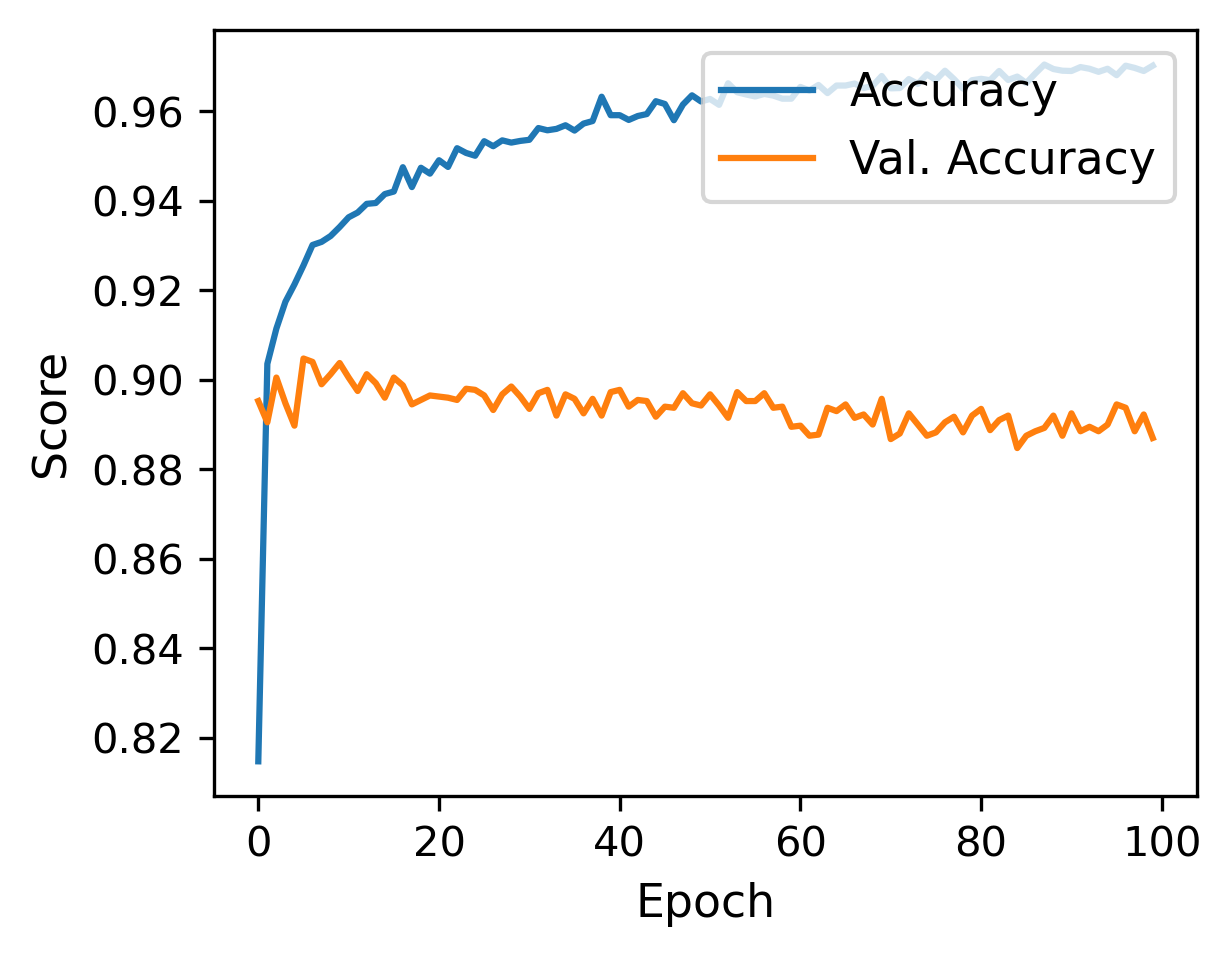

In [132]:
plt.figure(figsize=(4,3),dpi=300)
plt.plot(pred.history['accuracy'])
plt.plot(pred.history['val_accuracy'])
plt.ylabel('Score',fontsize=11)
plt.xlabel('Epoch',fontsize=11)
plt.legend(['Accuracy', 'Val. Accuracy'], loc='upper right',fontsize=11)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('TextCNN.png')
plt.show()

In [72]:
predict_x=model_conv.predict(X_valid) 
classes_x=np.argmax(predict_x,axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,classes_x))
print(confusion_matrix(rounded_labels,classes_x))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      3029
           1       0.88      0.91      0.90      2971

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000

[[2676  353]
 [ 274 2697]]


In [ ]:
plt.figure(figsize=(4,3),dpi=300)
plt.plot(pred.history['accuracy'])
plt.plot(pred.history['val_accuracy'])
plt.ylabel('Score',fontsize=11)
plt.xlabel('Epoch',fontsize=11)
plt.legend(['Accuracy', 'Val. Accuracy'], loc='upper right',fontsize=11)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('TextLSTM.png')
plt.show()

In [73]:
import time
start_time = time.time()

#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(5000,100, input_length=result.shape[1]))
model_conv.add(Dropout(0.5))
model_conv.add(layers.GRU(8, return_sequences=True))
model_conv.add(layers.SimpleRNN(32))
model_conv.add(Dense(32))
model_conv.add(Dense(2, activation='softmax'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
batch_size=16
#Here we train the Network.
pred1=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred1

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


11604/11604 - 41s - loss: 0.6664 - accuracy: 0.5403 - mae: 0.4783 - mse: 0.2408 - precision: 0.5251 - recall: 0.8192 - f1_score: 0.6339 - val_loss: 0.6516 - val_accuracy: 0.5595 - val_mae: 0.4689 - val_mse: 0.2344 - val_precision: 0.5239 - val_recall: 0.9317 - val_f1_score: 0.6707 - 41s/epoch - 3ms/step
Epoch 2/100
11604/11604 - 37s - loss: 0.6653 - accuracy: 0.5428 - mae: 0.4775 - mse: 0.2403 - precision: 0.5246 - recall: 0.9281 - f1_score: 0.6704 - val_loss: 0.6506 - val_accuracy: 0.5595 - val_mae: 0.4661 - val_mse: 0.2346 - val_precision: 0.5254 - val_recall: 0.9186 - val_f1_score: 0.6685 - 37s/epoch - 3ms/step
Epoch 3/100
11604/11604 - 39s - loss: 0.6648 - accuracy: 0.5445 - mae: 0.4774 - mse: 0.2402 - precision: 0.5258 - recall: 0.9198 - f1_score: 0.6691 - val_loss: 0.6512 - val_accuracy: 0.5595 - val_mae: 0.4675 - val_mse: 0.2339 - val_precision: 0.5259 - val_recall: 0.9226 - val_f1_score: 0.6700 - 39s/epoch - 3ms/step
Epoch 4/100
11604/11604 - 39s - loss: 0.6648 - accuracy: 0.54

KeyboardInterrupt: 

In [ ]:
predict_x=model_conv.predict(X_valid) 
classes_x=np.argmax(predict_x,axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,classes_x))
print(confusion_matrix(rounded_labels,classes_x))

In [ ]:
plt.figure(figsize=(4,3),dpi=300)
plt.plot(pred1.history['accuracy'])
plt.plot(pred1.history['val_accuracy'])
plt.ylabel('Score',fontsize=11)
plt.xlabel('Epoch',fontsize=11)
plt.legend(['Accuracy', 'Val. Accuracy'], loc='upper right',fontsize=11)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('TextGRU.png')
plt.show()

In [ ]:

#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(5000,100, input_length=result.shape[1]))
model_conv.add(Dropout(0.5))
model_conv.add(LSTM(100))
model_conv.add(Dense(32))
model_conv.add(Dense(2, activation='softmax'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
batch_size=16
#Here we train the Network.
pred1=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred1


In [ ]:
predict_x=model_conv.predict(X_valid) 
classes_x=np.argmax(predict_x,axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,classes_x))
print(confusion_matrix(rounded_labels,classes_x))

In [ ]:
plt.figure(figsize=(4,3),dpi=300)
plt.plot(pred1.history['accuracy'])
plt.plot(pred1.history['val_accuracy'])
plt.ylabel('Score',fontsize=11)
plt.xlabel('Epoch',fontsize=11)
plt.legend(['Accuracy', 'Val. Accuracy'], loc='upper right',fontsize=11)
plt.tight_layout(pad=0) 
# Show graphic
plt.savefig('TextLSTM.png')
plt.show()

# Other Sudies

In [ ]:
import time
start_time = time.time()

#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(5000,100, input_length=result.shape[1]))
model_conv.add(Dropout(0.5))
model_conv.add(LSTM(100, return_sequences=True))
model_conv.add(layers.GRU(100, return_sequences=True))
model_conv.add(layers.SimpleRNN(32))
model_conv.add(Dense(32))
model_conv.add(Dense(2, activation='softmax'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
batch_size=16
#Here we train the Network.
pred1=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred1

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
predict_x=model_conv.predict(X_valid) 
classes_x=np.argmax(predict_x,axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,classes_x))
print(confusion_matrix(rounded_labels,classes_x))

In [10]:
from keras import optimizers
#Deep Learning Network Structure
model = Sequential()
model.add(Embedding(5000,100, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(32))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
batch_size=16
#Here we train the Network.
pred1=model.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred1

Epoch 1/100


C:\Users\Sohail_Comp\anaconda3\lib\site-packages\keras_metrics\metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


KeyboardInterrupt: 

In [ ]:
predict_x=model.predict(X_valid) 
classes_x=np.argmax(predict_x,axis=1)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,classes_x))
print(confusion_matrix(rounded_labels,classes_x))